<a href="https://colab.research.google.com/github/fatemehm/IDS-DeepLearning/blob/main/BiFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob as gl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import glob as gl
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from sklearn.preprocessing import Normalizer
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D, Conv3D
from tensorflow.keras.optimizers import Adam

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


#**Bidirectional Packet**

#**Bi-Normal**#

In [ ]:
drop_columns = ['ip_src', 'ip_dst','prt_src','prt_dst', 'proto']
#Read Independent and Dependent Features
local_path= '/content/drive/MyDrive/biflow_features/biflow_normal.csv'
Bi_normal = pd.read_csv(local_path)
df_Bi_normal= Bi_normal.drop(columns=drop_columns).fillna(-1)

#df_Bi_scan_A.shape
df_Bi_normal.head()

,fwd_num_pkts,bwd_num_pkts,fwd_mean_iat,bwd_mean_iat,fwd_std_iat,bwd_std_iat,fwd_min_iat,bwd_min_iat,fwd_max_iat,bwd_max_iat,fwd_mean_pkt_len,bwd_mean_pkt_len,fwd_std_pkt_len,bwd_std_pkt_len,fwd_min_pkt_len,bwd_min_pkt_len,fwd_max_pkt_len,bwd_max_pkt_len,fwd_num_bytes,bwd_num_bytes,fwd_num_psh_flags,bwd_num_psh_flags,fwd_num_rst_flags,bwd_num_rst_flags,fwd_num_urg_flags,bwd_num_urg_flags,is_attack
0,7,5,0.000237,0.000203,0.000218,0.000193,0.000035,0.000004,0.000668,0.000432,63.428571,54.4,16.884965,3.2,52.0,52.0,101.0,60.0,444,272,3,1,0,0,0,0,0
1,7,5,0.000242,0.000243,0.000207,0.000231,0.000013,0.000004,0.000555,0.000484,69.000000,54.4,24.041631,3.2,52.0,52.0,112.0,60.0,483,272,3,1,0,0,0,0,0
2,7,5,0.000284,0.000349,0.000323,0.000397,0.000021,0.000004,0.000969,0.000983,75.857143,54.4,38.076722,3.2,52.0,52.0,160.0,60.0,531,272,3,1,0,0,0,0,0
3,7,5,0.001038,0.000968,0.000895,0.001016,0.000003,0.000005,0.002281,0.002480,66.000000,54.4,19.272482,3.2,52.0,52.0,100.0,60.0,462,272,3,1,0,0,0,0,0
4,7,5,0.001039,0.000968,0.000776,0.000924,0.000006,0.000004,0.002246,0.002206,66.142857,54.4,19.526016,3.2,52.0,52.0,101.0,60.0,463,272,3,1,0,0,0,0,0


In [ ]:
df_Bi_normal.shape

(86008, 27)

In [ ]:
X = df_Bi_normal.drop('is_attack', axis = 1)
y = df_Bi_normal['is_attack']
X.shape, y.shape

((86008, 26), (86008,))

In [ ]:
y.value_counts()

0    86008
Name: is_attack, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y= pd.get_dummies(y1).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 42)

In [ ]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
#THIS PART IS FOR CNN-RNN

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

**LSTM**

Epoch 1/100
126/126 [==============================] - 5s 19ms/step - loss: 0.5907 - accuracy: 0.9480 - val_loss: 0.3897 - val_accuracy: 1.0000
Epoch 2/100
126/126 [==============================] - 2s 14ms/step - loss: 0.2539 - accuracy: 0.9914 - val_loss: 0.0989 - val_accuracy: 1.0000
Epoch 3/100
126/126 [==============================] - 2s 14ms/step - loss: 0.1221 - accuracy: 0.9989 - val_loss: 0.0377 - val_accuracy: 1.0000
Epoch 4/100
126/126 [==============================] - 2s 14ms/step - loss: 0.0805 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 5/100
126/126 [==============================] - 2s 14ms/step - loss: 0.0599 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 6/100
126/126 [==============================] - 2s 15ms/step - loss: 0.0480 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 7/100
126/126 [==============================] - 2s 14ms/step - loss: 0.0401 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy:

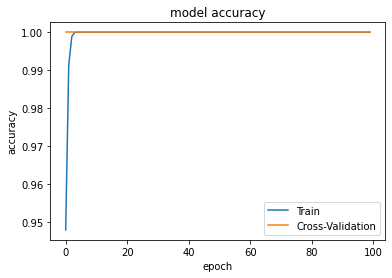

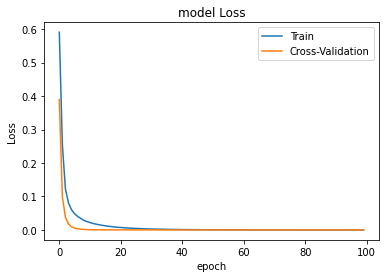

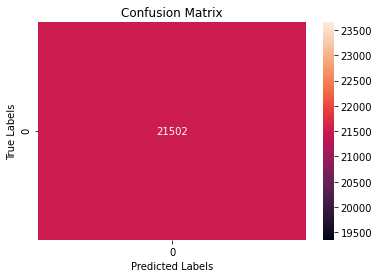

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_dim=(26,1)))  
model.add(Dropout(0.5))
model.add(Dense(2))


#model.add(Dense(2, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**DNN**

#**Bi-Scan_A**#

In [ ]:
drop_columns = ['ip_src', 'ip_dst','prt_src','prt_dst', 'proto']
#Read Independent and Dependent Features
local_path= '/content/drive/MyDrive/biflow_features/biflow_scan_A.csv'
Bi_scan_A = pd.read_csv(local_path)
df_Bi_scan_A= Bi_scan_A.drop(columns=drop_columns).fillna(-1)

#df_Bi_scan_A.shape
df_Bi_scan_A.head()


,fwd_num_pkts,bwd_num_pkts,fwd_mean_iat,bwd_mean_iat,fwd_std_iat,bwd_std_iat,fwd_min_iat,bwd_min_iat,fwd_max_iat,bwd_max_iat,fwd_mean_pkt_len,bwd_mean_pkt_len,fwd_std_pkt_len,bwd_std_pkt_len,fwd_min_pkt_len,bwd_min_pkt_len,fwd_max_pkt_len,bwd_max_pkt_len,fwd_num_bytes,bwd_num_bytes,fwd_num_psh_flags,bwd_num_psh_flags,fwd_num_rst_flags,bwd_num_rst_flags,fwd_num_urg_flags,bwd_num_urg_flags,is_attack
0,7,5,0.000344,0.000389,0.000344,0.000419,0.000050,0.000004,0.000973,0.001063,63.142857,54.4,16.487472,3.2,52.0,52.0,100.0,60.0,442,272,3,1,0,0,0,0,0
1,7,5,0.000309,0.000312,0.000302,0.000329,0.000004,0.000004,0.000777,0.000807,69.428571,54.4,24.904716,3.2,52.0,52.0,116.0,60.0,486,272,3,1,0,0,0,0,0
2,7,5,0.000357,0.000373,0.000381,0.000397,0.000003,0.000004,0.000998,0.000977,66.000000,54.4,19.272482,3.2,52.0,52.0,100.0,60.0,462,272,3,1,0,0,0,0,0
3,7,5,0.000359,0.000373,0.000375,0.000380,0.000003,0.000002,0.000905,0.000947,63.285714,54.4,16.807433,3.2,52.0,52.0,101.0,60.0,443,272,3,1,0,0,0,0,0
4,7,5,0.000273,0.000276,0.000231,0.000253,0.000034,0.000005,0.000613,0.000580,63.428571,54.4,16.884965,3.2,52.0,52.0,101.0,60.0,444,272,3,1,0,0,0,0,0


In [ ]:
df_Bi_scan_A.shape

(25693, 27)

In [ ]:
X = df_Bi_scan_A.drop('is_attack', axis = 1)
y = df_Bi_scan_A['is_attack']
X.shape, y.shape

((25693, 26), (25693,))

In [ ]:
y.value_counts()

1    19907
0     5786
Name: is_attack, dtype: int64

In [ ]:
smote = SMOTE(sampling_strategy = 'minority')
X_smote, y_smote = smote.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_smote.shape

(39814,)

In [ ]:
#X_smote, y_smote = SMOTE().fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y_smote)
Y_smote= pd.get_dummies(y1).values

In [ ]:
Y_smote.shape

(39814, 2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.25, random_state = 42)

In [ ]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
#THIS PART IS FOR CNN-RNN

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

**LSTM**

Epoch 1/100
59/59 [==============================] - 4s 22ms/step - loss: 0.6402 - accuracy: 0.8321 - val_loss: 0.5655 - val_accuracy: 0.9841
Epoch 2/100
59/59 [==============================] - 1s 15ms/step - loss: 0.4549 - accuracy: 0.8709 - val_loss: 0.2618 - val_accuracy: 0.9838
Epoch 3/100
59/59 [==============================] - 1s 15ms/step - loss: 0.2551 - accuracy: 0.9330 - val_loss: 0.0885 - val_accuracy: 0.9936
Epoch 4/100
59/59 [==============================] - 1s 14ms/step - loss: 0.1403 - accuracy: 0.9652 - val_loss: 0.0239 - val_accuracy: 0.9986
Epoch 5/100
59/59 [==============================] - 1s 14ms/step - loss: 0.0938 - accuracy: 0.9679 - val_loss: 0.0108 - val_accuracy: 0.9986
Epoch 6/100
59/59 [==============================] - 1s 14ms/step - loss: 0.0795 - accuracy: 0.9668 - val_loss: 0.0066 - val_accuracy: 0.9986
Epoch 7/100
59/59 [==============================] - 1s 14ms/step - loss: 0.0681 - accuracy: 0.9694 - val_loss: 0.0046 - val_accuracy: 0.9990
Epoch 

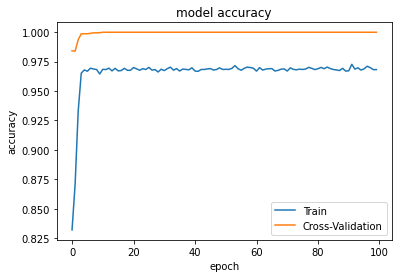

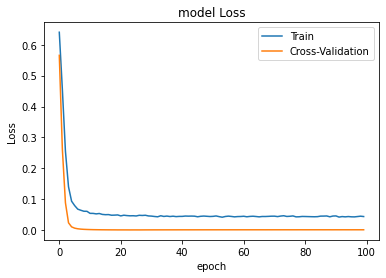

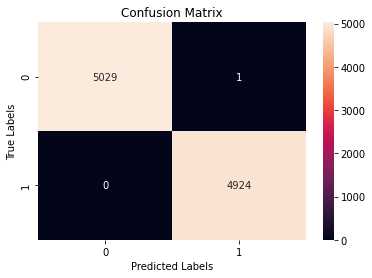

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_dim=(25,1)))  
model.add(Dropout(0.5))
model.add(Dense(2))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

In [ ]:
####LSTM#####
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplot()

cm = ([[5029,    1],
 [   0, 4924]])

sns.heatmap(cm, cmap= "YlGnBu", annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix- Aggressive scan');


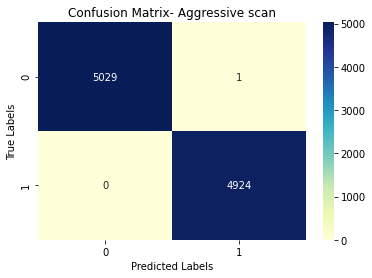

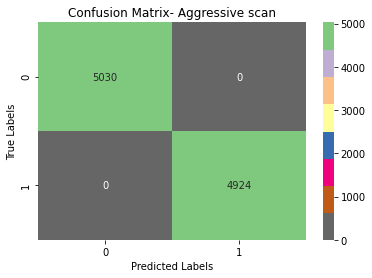

In [ ]:
####DNN#####
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplot()

cm = ([[5030,    0],
 [   0, 4924]])

sns.heatmap(cm, cmap="Accent_r", annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix- Aggressive scan');




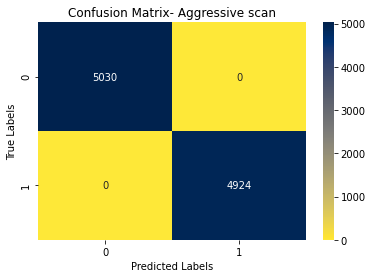

In [ ]:
####CNN-RNN#####
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplot()

cm = ([[5030,    0],
 [   0, 4924]])

sns.heatmap(cm, cmap= "cividis_r", annot = True, ax =ax, fmt='g'); # cmap= "RdYlBu_r" Set3_rSet3_r
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix- Aggressive scan');

**DNN**

Epoch 1/100
59/59 [==============================] - 1s 7ms/step - loss: 0.2518 - accuracy: 0.9304 - val_loss: 0.0257 - val_accuracy: 0.9992
Epoch 2/100
59/59 [==============================] - 0s 5ms/step - loss: 0.0359 - accuracy: 0.9970 - val_loss: 0.0143 - val_accuracy: 0.9996
Epoch 3/100
59/59 [==============================] - 0s 4ms/step - loss: 0.0200 - accuracy: 0.9988 - val_loss: 0.0092 - val_accuracy: 0.9996
Epoch 4/100
59/59 [==============================] - 0s 5ms/step - loss: 0.0149 - accuracy: 0.9990 - val_loss: 0.0045 - val_accuracy: 0.9996
Epoch 5/100
59/59 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.9992 - val_loss: 0.0023 - val_accuracy: 0.9996
Epoch 6/100
59/59 [==============================] - 0s 5ms/step - loss: 0.0052 - accuracy: 0.9994 - val_loss: 0.0010 - val_accuracy: 0.9996
Epoch 7/100
59/59 [==============================] - 0s 4ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 2.7106e-04 - val_accuracy: 1.0000
Epoch 8/1

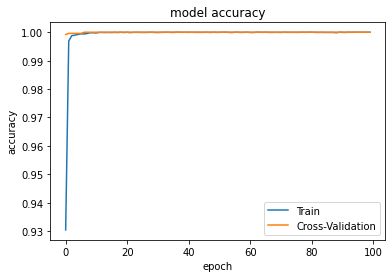

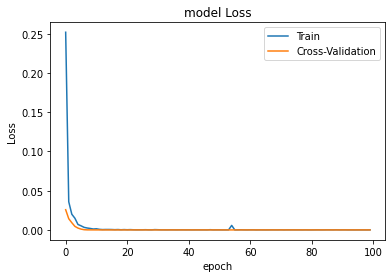

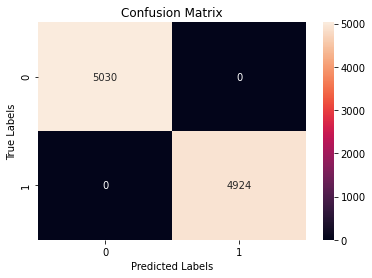

In [ ]:
from keras.layers import Dense, Dropout, Activation, Embedding



# 1. define the network
model = Sequential()
model.add(Dense(64,input_shape=(25,1),activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(2))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    
print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**CNN-RNN**

Epoch 1/100
59/59 [==============================] - 26s 41ms/step - loss: 0.3193 - accuracy: 0.8577 - val_loss: 0.0655 - val_accuracy: 0.9996
Epoch 2/100
59/59 [==============================] - 2s 30ms/step - loss: 0.0153 - accuracy: 0.9995 - val_loss: 0.0334 - val_accuracy: 0.9996
Epoch 3/100
59/59 [==============================] - 2s 30ms/step - loss: 0.0085 - accuracy: 0.9996 - val_loss: 0.0201 - val_accuracy: 0.9996
Epoch 4/100
59/59 [==============================] - 2s 30ms/step - loss: 0.0066 - accuracy: 0.9996 - val_loss: 0.0127 - val_accuracy: 0.9996
Epoch 5/100
59/59 [==============================] - 2s 30ms/step - loss: 0.0058 - accuracy: 0.9995 - val_loss: 0.0080 - val_accuracy: 0.9996
Epoch 6/100
59/59 [==============================] - 2s 28ms/step - loss: 0.0050 - accuracy: 0.9996 - val_loss: 0.0054 - val_accuracy: 0.9996
Epoch 7/100
59/59 [==============================] - 2s 26ms/step - loss: 0.0047 - accuracy: 0.9995 - val_loss: 0.0039 - val_accuracy: 0.9996
Epoch

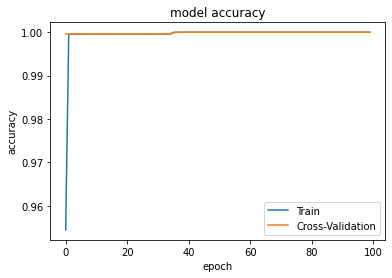

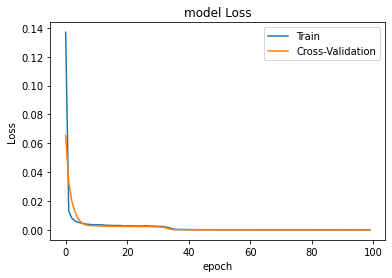

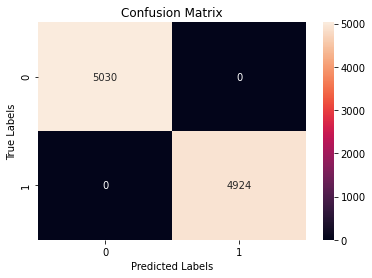

In [ ]:
import numpy as np


from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

from keras.layers import LSTM, GRU, SimpleRNN

lstm_output_size = 20
epochs = 100
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(SimpleRNN(lstm_output_size))
model.add(Dropout(0.2))


model.add(Dense(2, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
    #])
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=epochs, batch_size=512, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)

print(confusion_matrix(y_test_class, y_pred_class))
print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

#**Bi-Scan_Su**#

In [ ]:
drop_columns = ['ip_src', 'ip_dst','prt_src','prt_dst', 'proto']
#Read Independent and Dependent Features
local_path= '/content/drive/MyDrive/biflow_features/biflow_scan_sU.csv'
Bi_scan_sU = pd.read_csv(local_path)
df_Bi_scan_sU= Bi_scan_sU.drop(columns=drop_columns).fillna(-1)

#df_Bi_scan_A.shape
df_Bi_scan_sU.head()

,fwd_num_pkts,bwd_num_pkts,fwd_mean_iat,bwd_mean_iat,fwd_std_iat,bwd_std_iat,fwd_min_iat,bwd_min_iat,fwd_max_iat,bwd_max_iat,fwd_mean_pkt_len,bwd_mean_pkt_len,fwd_std_pkt_len,bwd_std_pkt_len,fwd_min_pkt_len,bwd_min_pkt_len,fwd_max_pkt_len,bwd_max_pkt_len,fwd_num_bytes,bwd_num_bytes,fwd_num_psh_flags,bwd_num_psh_flags,fwd_num_rst_flags,bwd_num_rst_flags,fwd_num_urg_flags,bwd_num_urg_flags,is_attack
0,7,5,0.001523,0.001555,0.001327,0.001531,0.000142,0.000025,0.003380,0.003133,65.857143,54.4,19.245991,3.2,52.0,52.0,102.0,60.0,461,272,3,1,0,0,0,0,0
1,7,5,0.000356,0.000386,0.000359,0.000393,0.000005,0.000005,0.000945,0.000907,69.857143,54.4,25.614887,3.2,52.0,52.0,118.0,60.0,489,272,3,1,0,0,0,0,0
2,7,5,0.000944,0.001273,0.001160,0.001318,0.000005,0.000016,0.003076,0.003141,66.285714,54.4,19.717391,3.2,52.0,52.0,101.0,60.0,464,272,3,1,0,0,0,0,0
3,7,5,0.001014,0.001357,0.001166,0.001301,0.000004,0.000005,0.002791,0.002755,63.428571,54.4,16.884965,3.2,52.0,52.0,101.0,60.0,444,272,3,1,0,0,0,0,0
4,7,5,0.000708,0.000802,0.000823,0.000905,0.000004,0.000003,0.002236,0.002261,72.857143,54.4,31.606638,3.2,52.0,52.0,139.0,60.0,510,272,3,1,0,0,0,0,0


In [ ]:
df_Bi_scan_sU.shape

(39664, 27)

In [ ]:
X = df_Bi_scan_sU.drop('is_attack', axis = 1)
y = df_Bi_scan_sU['is_attack']
X.shape, y.shape

((39664, 26), (39664,))

In [ ]:
X.head()

,fwd_num_pkts,bwd_num_pkts,fwd_mean_iat,bwd_mean_iat,fwd_std_iat,bwd_std_iat,fwd_min_iat,bwd_min_iat,fwd_max_iat,bwd_max_iat,fwd_mean_pkt_len,bwd_mean_pkt_len,fwd_std_pkt_len,bwd_std_pkt_len,fwd_min_pkt_len,bwd_min_pkt_len,fwd_max_pkt_len,bwd_max_pkt_len,fwd_num_bytes,bwd_num_bytes,fwd_num_psh_flags,bwd_num_psh_flags,fwd_num_rst_flags,bwd_num_rst_flags,fwd_num_urg_flags,bwd_num_urg_flags
0,7,5,0.001523,0.001555,0.001327,0.001531,0.000142,0.000025,0.003380,0.003133,65.857143,54.4,19.245991,3.2,52.0,52.0,102.0,60.0,461,272,3,1,0,0,0,0
1,7,5,0.000356,0.000386,0.000359,0.000393,0.000005,0.000005,0.000945,0.000907,69.857143,54.4,25.614887,3.2,52.0,52.0,118.0,60.0,489,272,3,1,0,0,0,0
2,7,5,0.000944,0.001273,0.001160,0.001318,0.000005,0.000016,0.003076,0.003141,66.285714,54.4,19.717391,3.2,52.0,52.0,101.0,60.0,464,272,3,1,0,0,0,0
3,7,5,0.001014,0.001357,0.001166,0.001301,0.000004,0.000005,0.002791,0.002755,63.428571,54.4,16.884965,3.2,52.0,52.0,101.0,60.0,444,272,3,1,0,0,0,0
4,7,5,0.000708,0.000802,0.000823,0.000905,0.000004,0.000003,0.002236,0.002261,72.857143,54.4,31.606638,3.2,52.0,52.0,139.0,60.0,510,272,3,1,0,0,0,0


In [ ]:
y.value_counts()

1    22434
0    17230
Name: is_attack, dtype: int64

In [ ]:
X_smote, y_smote = SMOTE().fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y_smote)
Y_smote= pd.get_dummies(y1).values

In [ ]:
Y_smote

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.25, random_state = 42)

In [ ]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
#THIS PART IS FOR CNN-RNN

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

**LSTM**

Epoch 1/100
66/66 [==============================] - 4s 22ms/step - loss: 0.6359 - accuracy: 0.8452 - val_loss: 0.5837 - val_accuracy: 0.9915
Epoch 2/100
66/66 [==============================] - 1s 14ms/step - loss: 0.5000 - accuracy: 0.9102 - val_loss: 0.3631 - val_accuracy: 0.9950
Epoch 3/100
66/66 [==============================] - 1s 14ms/step - loss: 0.3240 - accuracy: 0.9616 - val_loss: 0.2066 - val_accuracy: 0.9950
Epoch 4/100
66/66 [==============================] - 1s 14ms/step - loss: 0.2320 - accuracy: 0.9629 - val_loss: 0.1326 - val_accuracy: 0.9950
Epoch 5/100
66/66 [==============================] - 1s 14ms/step - loss: 0.1835 - accuracy: 0.9640 - val_loss: 0.0925 - val_accuracy: 0.9950
Epoch 6/100
66/66 [==============================] - 1s 14ms/step - loss: 0.1588 - accuracy: 0.9619 - val_loss: 0.0698 - val_accuracy: 0.9954
Epoch 7/100
66/66 [==============================] - 1s 13ms/step - loss: 0.1398 - accuracy: 0.9628 - val_loss: 0.0567 - val_accuracy: 0.9954
Epoch 

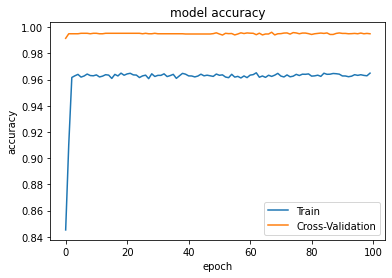

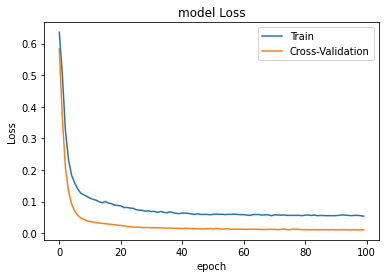

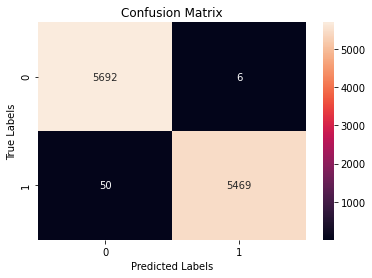

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_dim=X_train.shape[0]))  
model.add(Dropout(0.5))
model.add(Dense(2))


model.add(Dense(2, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

In [ ]:
####LSTM#####
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplot()

cm = ([[5029,    1],
 [   0, 4924]])

sns.heatmap(cm, cmap= "YlGnBu", annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix- Aggressive scan');

####DNN#####
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplot()

cm = ([[5030,    0],
 [   0, 4924]])

sns.heatmap(cm, cmap="Accent_r", annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix- Aggressive scan');


####CNN-RNN#####
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplot()

cm = ([[5030,    0],
 [   0, 4924]])

sns.heatmap(cm, cmap= "cividis_r", annot = True, ax =ax, fmt='g'); # cmap= "RdYlBu_r" Set3_rSet3_r
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix- Aggressive scan');

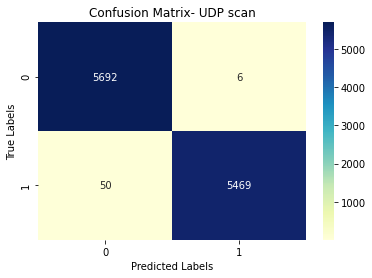

In [ ]:
###LSTM#####
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplot()

cm = ([[5692,    6],
 [  50, 5469]])

sns.heatmap(cm, cmap= "YlGnBu", annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix- UDP scan');



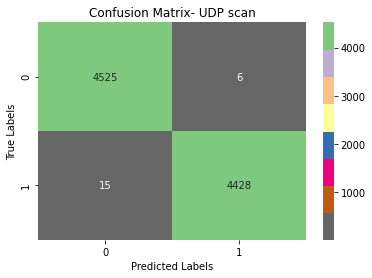

In [ ]:
####DNN#####
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplot()

cm = ([[4525,    6],
 [  15, 4428]])

sns.heatmap(cm, cmap="Accent_r", annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix- UDP scan');




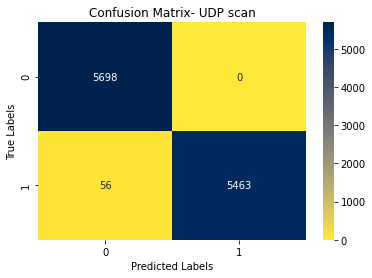

In [ ]:
####CNN-RNN#####
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplot()

cm = ([[5698,    0],
 [  56, 5463]])

sns.heatmap(cm, cmap= "cividis_r", annot = True, ax =ax, fmt='g'); # cmap= "RdYlBu_r" Set3_rSet3_r
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix- UDP scan');

**DNN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
71/71 [==============================] - 4s 11ms/step - loss: 0.2371 - accuracy: 0.9403 - val_loss: 0.0408 - val_accuracy: 0.9955
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0419 - accuracy: 0.9906 - val_loss: 0.0333 - val_accuracy: 0.9955
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0329 - accuracy: 0.9914 - val_loss: 0.0280 - val_accuracy: 0.9955
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0276 - accuracy: 0.9921 - val_loss: 0.0235 - val_accuracy: 0.9952
Epoch 5/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0257 - accuracy: 0.9923 - val_loss: 0.0200 - val_accuracy: 0.9952
Epoch 6/100
71/71 [==============================] - 0s 5ms/step - loss: 0.0221 - accuracy: 0.9935 - val_loss: 0.0176 - val_accuracy: 0.9952
Epoch 7/100
71/71 [==============================] - 0s 4ms/step - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0154 - val_accuracy: 0.9952
Epoch 8/100


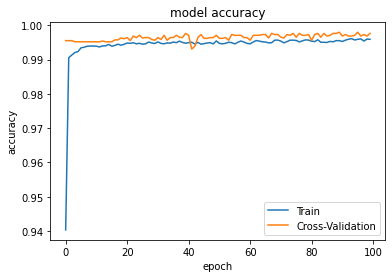

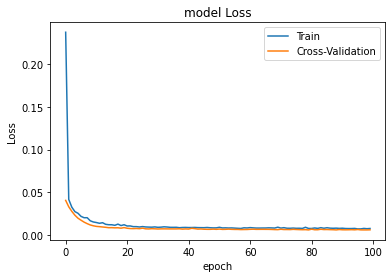

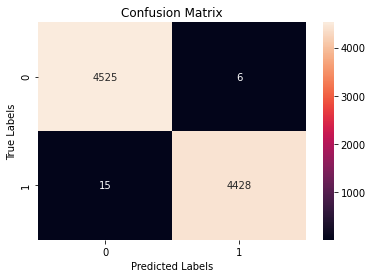

In [ ]:
from keras.layers import Dense, Dropout, Activation, Embedding

# 1. define the network
model = Sequential()
model.add(Dense(64,input_shape=(13,1),activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(1))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    
print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

In [ ]:
#THIS PART IS FOR CNN-RNN

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

**CNN-RNN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
66/66 [==============================] - 30s 46ms/step - loss: 0.8855 - accuracy: 0.4366 - val_loss: 0.8278 - val_accuracy: 0.5080
Epoch 2/100
66/66 [==============================] - 2s 32ms/step - loss: 0.5422 - accuracy: 0.7336 - val_loss: 0.6680 - val_accuracy: 0.5080
Epoch 3/100
66/66 [==============================] - 2s 29ms/step - loss: 0.3670 - accuracy: 0.8841 - val_loss: 0.4676 - val_accuracy: 0.9954
Epoch 4/100
66/66 [==============================] - 2s 27ms/step - loss: 0.2784 - accuracy: 0.9327 - val_loss: 0.3051 - val_accuracy: 0.9626
Epoch 5/100
66/66 [==============================] - 3s 47ms/step - loss: 0.2325 - accuracy: 0.9501 - val_loss: 0.2097 - val_accuracy: 0.9626
Epoch 6/100
66/66 [==============================] - 3s 44ms/step - loss: 0.2015 - accuracy: 0.9570 - val_loss: 0.1619 - val_accuracy: 0.9626
Epoch 7/100
66/66 [==============================] - 2s 28ms/step - loss: 0.1833 - accuracy: 0.9582 - val_loss: 0.1373 - val_accuracy: 0.9626
Epoch

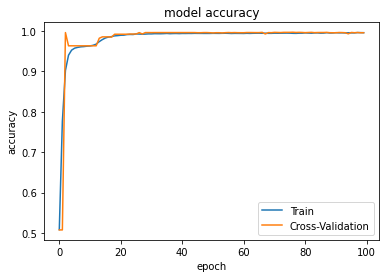

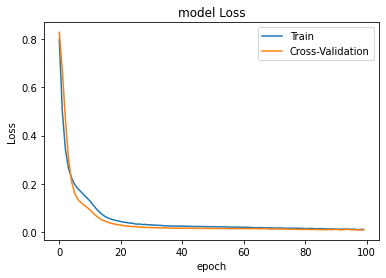

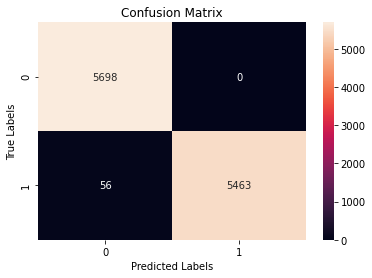

In [ ]:

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

from keras.layers import LSTM, GRU, SimpleRNN

lstm_output_size = 20
epochs = 100
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(SimpleRNN(lstm_output_size))
model.add(Dropout(0.5))


model.add(Dense(2, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
    #])
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=epochs, batch_size=512, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

#**Bi_MQTT**#

In [ ]:
drop_columns = ['ip_src', 'ip_dst','prt_src','prt_dst', 'proto']
#Read Independent and Dependent Features
local_path= '/content/drive/MyDrive/biflow_features/biflow_mqtt_bruteforce.csv'
Bi_mqtt = pd.read_csv(local_path)
df_Bi_mqtt= Bi_mqtt.drop(columns=drop_columns).fillna(-1)

#df_Bi_scan_A.shape
df_Bi_mqtt.head()


,fwd_num_pkts,bwd_num_pkts,fwd_mean_iat,bwd_mean_iat,fwd_std_iat,bwd_std_iat,fwd_min_iat,bwd_min_iat,fwd_max_iat,bwd_max_iat,fwd_mean_pkt_len,bwd_mean_pkt_len,fwd_std_pkt_len,bwd_std_pkt_len,fwd_min_pkt_len,bwd_min_pkt_len,fwd_max_pkt_len,bwd_max_pkt_len,fwd_num_bytes,bwd_num_bytes,fwd_num_psh_flags,bwd_num_psh_flags,fwd_num_rst_flags,bwd_num_rst_flags,fwd_num_urg_flags,bwd_num_urg_flags,is_attack
0,2,2,0.000008,0.000016,0.0,0.0,0.000008,0.000016,0.000008,0.000016,83.0,83.0,0.0,0.0,83.0,83.0,83.0,83.0,166,166,0,0,0,0,0,0,1
1,1,1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,87.0,76.0,0.0,0.0,87.0,76.0,87.0,76.0,87,76,0,0,0,0,0,0,0
2,1,1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,87.0,76.0,0.0,0.0,87.0,76.0,87.0,76.0,87,76,0,0,0,0,0,0,0
3,2,2,0.000007,0.000020,0.0,0.0,0.000007,0.000020,0.000007,0.000020,67.0,67.0,0.0,0.0,67.0,67.0,67.0,67.0,134,134,0,0,0,0,0,0,0
4,1,1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,71.0,60.0,0.0,0.0,71.0,60.0,71.0,60.0,71,60,0,0,0,0,0,0,0


In [ ]:
df_Bi_mqtt.shape

(16696, 27)

In [ ]:
X = df_Bi_mqtt.drop('is_attack', axis = 1)
y = df_Bi_mqtt['is_attack']
X.shape, y.shape

((16696, 26), (16696,))

In [ ]:
y.value_counts()

1    14544
0     2152
Name: is_attack, dtype: int64

In [ ]:
X_smote, y_smote = SMOTE().fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y_smote)
Y_smote= pd.get_dummies(y1).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.25, random_state = 42)

In [ ]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
#THIS PART IS FOR CNN-RNN

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

**LSTM**

Epoch 1/100
43/43 [==============================] - 3s 26ms/step - loss: 0.6970 - accuracy: 0.4644 - val_loss: 0.6890 - val_accuracy: 0.5014
Epoch 2/100
43/43 [==============================] - 1s 13ms/step - loss: 0.6800 - accuracy: 0.6286 - val_loss: 0.6651 - val_accuracy: 0.7728
Epoch 3/100
43/43 [==============================] - 1s 14ms/step - loss: 0.6368 - accuracy: 0.6962 - val_loss: 0.5737 - val_accuracy: 0.9080
Epoch 4/100
43/43 [==============================] - 1s 14ms/step - loss: 0.4852 - accuracy: 0.8196 - val_loss: 0.2944 - val_accuracy: 0.9824
Epoch 5/100
43/43 [==============================] - 1s 15ms/step - loss: 0.2878 - accuracy: 0.8916 - val_loss: 0.1439 - val_accuracy: 0.9832
Epoch 6/100
43/43 [==============================] - 1s 15ms/step - loss: 0.2043 - accuracy: 0.9440 - val_loss: 0.1008 - val_accuracy: 0.9834
Epoch 7/100
43/43 [==============================] - 1s 15ms/step - loss: 0.1691 - accuracy: 0.9538 - val_loss: 0.0842 - val_accuracy: 0.9838
Epoch 

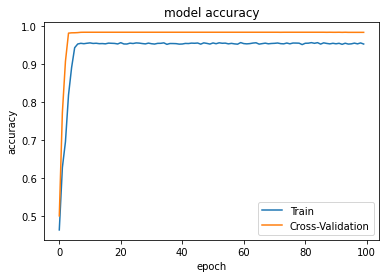

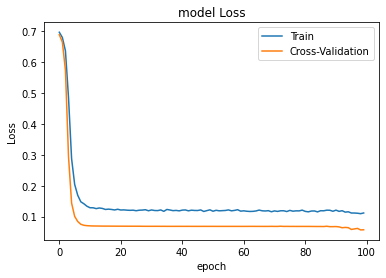

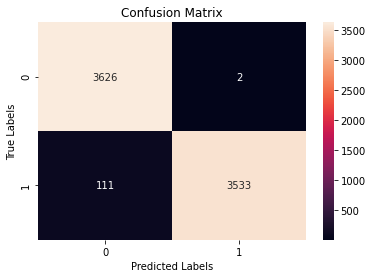

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_dim=(25,1)))  
model.add(Dropout(0.5))
model.add(Dense(2))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

In [ ]:
####LSTM#####
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplot()

cm = ([[5029,    1],
 [   0, 4924]])

sns.heatmap(cm, cmap= "YlGnBu", annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix- Aggressive scan');

####DNN#####
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplot()

cm = ([[5030,    0],
 [   0, 4924]])

sns.heatmap(cm, cmap="Accent_r", annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix- Aggressive scan');


####CNN-RNN#####
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplot()

cm = ([[5030,    0],
 [   0, 4924]])

sns.heatmap(cm, cmap= "cividis_r", annot = True, ax =ax, fmt='g'); # cmap= "RdYlBu_r" Set3_rSet3_r
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix- Aggressive scan');

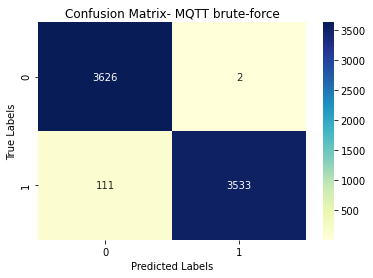

In [ ]:
####LSTM#####
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplot()

cm = ([[3626,    2],
 [ 111, 3533]])

sns.heatmap(cm, cmap= "YlGnBu", annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix- MQTT brute-force');



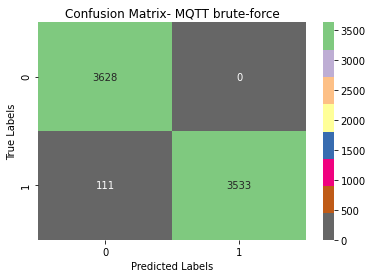

In [ ]:
####DNN#####
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplot()

cm = ([[3628,    0],
 [ 111, 3533]])

sns.heatmap(cm, cmap="Accent_r", annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix- MQTT brute-force');




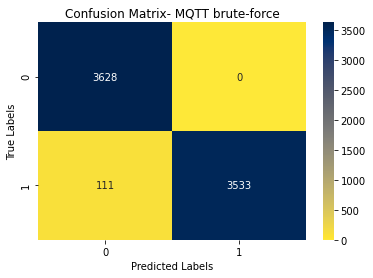

In [ ]:
####CNN-RNN#####
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplot()

cm = ([[3628,    0],
 [ 111, 3533]])

sns.heatmap(cm, cmap= "cividis_r", annot = True, ax =ax, fmt='g'); # cmap= "RdYlBu_r" Set3_rSet3_r
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix- MQTT brute-force');

**DNN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
43/43 [==============================] - 2s 18ms/step - loss: 0.2817 - accuracy: 0.8983 - val_loss: 0.0947 - val_accuracy: 0.9836
Epoch 2/100
43/43 [==============================] - 0s 10ms/step - loss: 0.1217 - accuracy: 0.9835 - val_loss: 0.0747 - val_accuracy: 0.9847
Epoch 3/100
43/43 [==============================] - 0s 10ms/step - loss: 0.0971 - accuracy: 0.9839 - val_loss: 0.0681 - val_accuracy: 0.9847
Epoch 4/100
43/43 [==============================] - 0s 9ms/step - loss: 0.0813 - accuracy: 0.9843 - val_loss: 0.0644 - val_accuracy: 0.9847
Epoch 5/100
43/43 [==============================] - 0s 8ms/step - loss: 0.0772 - accuracy: 0.9848 - val_loss: 0.0622 - val_accuracy: 0.9847
Epoch 6/100
43/43 [==============================] - 0s 10ms/step - loss: 0.0702 - accuracy: 0.9849 - val_loss: 0.0572 - val_accuracy: 0.9847
Epoch 7/100
43/43 [==============================] - 0s 9ms/step - loss: 0.0673 - accuracy: 0.9850 - val_loss: 0.0551 - val_accuracy: 0.9847
Epoch 8/1

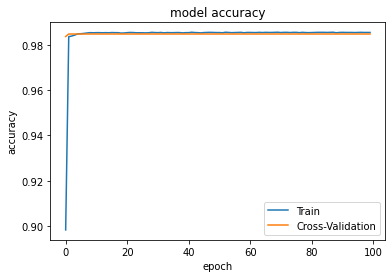

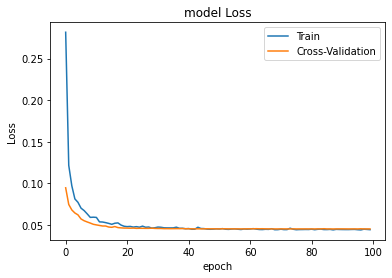

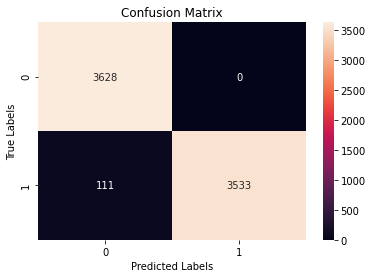

In [ ]:
from keras.layers import Dense, Dropout, Activation, Embedding
from sklearn.metrics import roc_curve, auc
#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(Dense(64,input_shape=(25,1),activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(1))

model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1, shuffle=True)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)

print(confusion_matrix(y_test_class, y_pred_class))
print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');


**CNN-RNN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
43/43 [==============================] - 28s 47ms/step - loss: 1.1103 - accuracy: 0.4072 - val_loss: 0.6882 - val_accuracy: 0.7070
Epoch 2/100
43/43 [==============================] - 1s 27ms/step - loss: 0.7588 - accuracy: 0.5572 - val_loss: 0.5525 - val_accuracy: 0.7774
Epoch 3/100
43/43 [==============================] - 1s 27ms/step - loss: 0.5792 - accuracy: 0.6994 - val_loss: 0.4292 - val_accuracy: 0.8157
Epoch 4/100
43/43 [==============================] - 1s 26ms/step - loss: 0.4518 - accuracy: 0.7937 - val_loss: 0.3284 - val_accuracy: 0.9845
Epoch 5/100
43/43 [==============================] - 1s 26ms/step - loss: 0.3612 - accuracy: 0.8568 - val_loss: 0.2522 - val_accuracy: 0.9845
Epoch 6/100
43/43 [==============================] - 1s 28ms/step - loss: 0.3006 - accuracy: 0.8964 - val_loss: 0.1965 - val_accuracy: 0.9846
Epoch 7/100
43/43 [==============================] - 1s 27ms/step - loss: 0.2579 - accuracy: 0.9202 - val_loss: 0.1594 - val_accuracy: 0.9846
Epoch

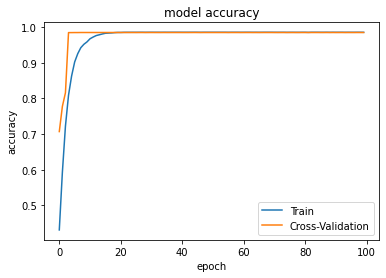

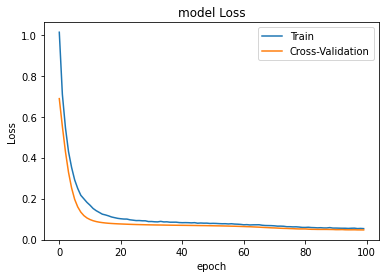

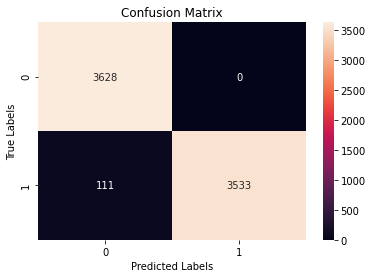

In [ ]:
import numpy as np


from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding



import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

from keras.layers import LSTM, GRU, SimpleRNN

lstm_output_size = 20
epochs = 100
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(SimpleRNN(lstm_output_size))
model.add(Dropout(0.5))


model.add(Dense(2, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
    #])
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=epochs, batch_size=512, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');


#**Bi-overall**#

In [ ]:
drop_columns = ['ip_src', 'ip_dst','prt_src','prt_dst', 'proto']
#Read Independent and Dependent Features
local_path= '/content/drive/MyDrive/biflow_features'
all_files = gl.glob(local_path + "/*.csv")
df_bi= pd.concat((pd.read_csv(f) for f in all_files))

df_Bi= df_bi.drop(columns=drop_columns).fillna(-1)

df_Bi.shape

(168061, 27)

In [ ]:
df_Bi.head()

,fwd_num_pkts,bwd_num_pkts,fwd_mean_iat,bwd_mean_iat,fwd_std_iat,bwd_std_iat,fwd_min_iat,bwd_min_iat,fwd_max_iat,bwd_max_iat,fwd_mean_pkt_len,bwd_mean_pkt_len,fwd_std_pkt_len,bwd_std_pkt_len,fwd_min_pkt_len,bwd_min_pkt_len,fwd_max_pkt_len,bwd_max_pkt_len,fwd_num_bytes,bwd_num_bytes,fwd_num_psh_flags,bwd_num_psh_flags,fwd_num_rst_flags,bwd_num_rst_flags,fwd_num_urg_flags,bwd_num_urg_flags,is_attack
0,7,5,0.000237,0.000203,0.000218,0.000193,0.000035,0.000004,0.000668,0.000432,63.428571,54.4,16.884965,3.2,52.0,52.0,101.0,60.0,444,272,3,1,0,0,0,0,0
1,7,5,0.000242,0.000243,0.000207,0.000231,0.000013,0.000004,0.000555,0.000484,69.000000,54.4,24.041631,3.2,52.0,52.0,112.0,60.0,483,272,3,1,0,0,0,0,0
2,7,5,0.000284,0.000349,0.000323,0.000397,0.000021,0.000004,0.000969,0.000983,75.857143,54.4,38.076722,3.2,52.0,52.0,160.0,60.0,531,272,3,1,0,0,0,0,0
3,7,5,0.001038,0.000968,0.000895,0.001016,0.000003,0.000005,0.002281,0.002480,66.000000,54.4,19.272482,3.2,52.0,52.0,100.0,60.0,462,272,3,1,0,0,0,0,0
4,7,5,0.001039,0.000968,0.000776,0.000924,0.000006,0.000004,0.002246,0.002206,66.142857,54.4,19.526016,3.2,52.0,52.0,101.0,60.0,463,272,3,1,0,0,0,0,0


In [ ]:
X = df_Bi.drop('is_attack', axis = 1)
y = df_Bi['is_attack']
X.shape, y.shape

((168061, 26), (168061,))

In [ ]:
X.head()

,fwd_num_pkts,bwd_num_pkts,fwd_mean_iat,bwd_mean_iat,fwd_std_iat,bwd_std_iat,fwd_min_iat,bwd_min_iat,fwd_max_iat,bwd_max_iat,fwd_mean_pkt_len,bwd_mean_pkt_len,fwd_std_pkt_len,bwd_std_pkt_len,fwd_min_pkt_len,bwd_min_pkt_len,fwd_max_pkt_len,bwd_max_pkt_len,fwd_num_bytes,bwd_num_bytes,fwd_num_psh_flags,bwd_num_psh_flags,fwd_num_rst_flags,bwd_num_rst_flags,fwd_num_urg_flags,bwd_num_urg_flags
0,7,5,0.000237,0.000203,0.000218,0.000193,0.000035,0.000004,0.000668,0.000432,63.428571,54.4,16.884965,3.2,52.0,52.0,101.0,60.0,444,272,3,1,0,0,0,0
1,7,5,0.000242,0.000243,0.000207,0.000231,0.000013,0.000004,0.000555,0.000484,69.000000,54.4,24.041631,3.2,52.0,52.0,112.0,60.0,483,272,3,1,0,0,0,0
2,7,5,0.000284,0.000349,0.000323,0.000397,0.000021,0.000004,0.000969,0.000983,75.857143,54.4,38.076722,3.2,52.0,52.0,160.0,60.0,531,272,3,1,0,0,0,0
3,7,5,0.001038,0.000968,0.000895,0.001016,0.000003,0.000005,0.002281,0.002480,66.000000,54.4,19.272482,3.2,52.0,52.0,100.0,60.0,462,272,3,1,0,0,0,0
4,7,5,0.001039,0.000968,0.000776,0.000924,0.000006,0.000004,0.002246,0.002206,66.142857,54.4,19.526016,3.2,52.0,52.0,101.0,60.0,463,272,3,1,0,0,0,0


In [ ]:
y.value_counts()

0    111176
1     56885
Name: is_attack, dtype: int64

In [ ]:
X_smote, y_smote = SMOTE().fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y_smote)
Y_smote= pd.get_dummies(y1).values

In [ ]:
Y_smote

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.2, random_state = 42)

In [ ]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
X_train

array([[-0.14620754, -0.141675  , -0.03951543, ..., -0.25737607,
        -0.00878199,  0.        ],
       [-0.14620754, -0.141675  , -0.03951595, ..., -0.25737607,
        -0.00878199,  0.        ],
       [ 2.17707026,  2.08537175,  0.05380906, ...,  4.60751713,
        -0.00878199,  0.        ],
       ...,
       [-0.14620754, -0.141675  , -0.03951634, ..., -0.25737607,
        -0.00878199,  0.        ],
       [-0.14620754, -0.141675  , -0.03951505, ..., -0.25737607,
        -0.00878199,  0.        ],
       [-0.14620754, -0.141675  , -0.03951628, ..., -0.25737607,
        -0.00878199,  0.        ]])

In [ ]:
X_test

array([[-0.25485402, -0.24538343, -0.04059785, ..., -0.24787382,
        -0.00820609,  0.        ],
       [-0.25485402, -0.24538343, -0.04059785, ..., -0.24787382,
        -0.00820609,  0.        ],
       [ 2.8247887 ,  2.70885744,  0.04399536, ...,  3.53396342,
        -0.00820609,  0.        ],
       ...,
       [-0.23060487, -0.22878657, -0.04059485, ..., -0.24787382,
        -0.00820609,  0.        ],
       [-0.23060487, -0.22878657, -0.04059422, ..., -0.24787382,
        -0.00820609,  0.        ],
       [-0.23060487, -0.22878657, -0.04058091, ..., -0.24787382,
        -0.00820609,  0.        ]])

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

**LSTM**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
348/348 [==============================] - 39s 103ms/step - loss: 0.0837 - accuracy: 0.9756 - val_loss: 0.0277 - val_accuracy: 0.9937
Epoch 2/100
348/348 [==============================] - 30s 87ms/step - loss: 0.0258 - accuracy: 0.9938 - val_loss: 0.0226 - val_accuracy: 0.9947
Epoch 3/100
348/348 [==============================] - 30s 88ms/step - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.0163 - val_accuracy: 0.9940
Epoch 4/100
348/348 [==============================] - 31s 88ms/step - loss: 0.0165 - accuracy: 0.9938 - val_loss: 0.0156 - val_accuracy: 0.9940
Epoch 5/100
348/348 [==============================] - 31s 89ms/step - loss: 0.0154 - accuracy: 0.9940 - val_loss: 0.0135 - val_accuracy: 0.9951
Epoch 6/100
348/348 [==============================] - 30s 87ms/step - loss: 0.0149 - accuracy: 0.9940 - val_loss: 0.0136 - val_accuracy: 0.9942
Epoch 7/100
348/348 [==============================] - 30s 86ms/step - loss: 0.0180 - accuracy: 0.9938 - val_loss: 0.0181 - val_a

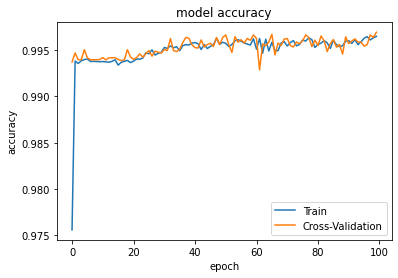

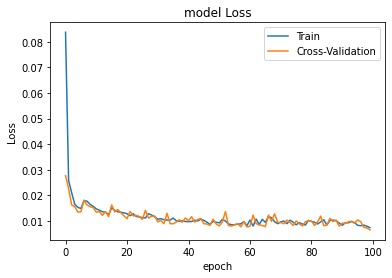

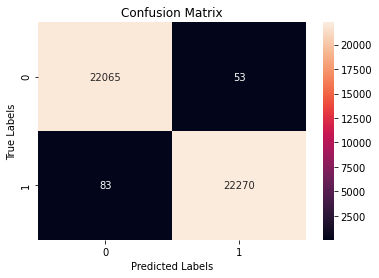

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(64,input_dim=25)) 
model.add(Dropout(0.1))
model.add(Dense(1))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

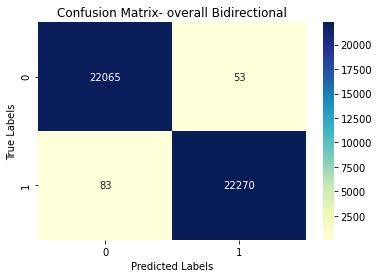

In [ ]:
####LSTM###
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplot()

cm = ([[22065,    53],
 [   83, 22270]])

sns.heatmap(cm, cmap= "YlGnBu", annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix- overall Bidirectional');

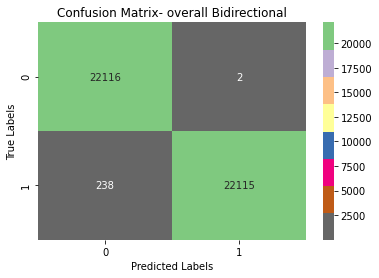

In [ ]:
####DNN#####
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplot()

cm = ([[22116,     2],
 [  238, 22115]])

sns.heatmap(cm, cmap="Accent_r", annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix- overall Bidirectional');

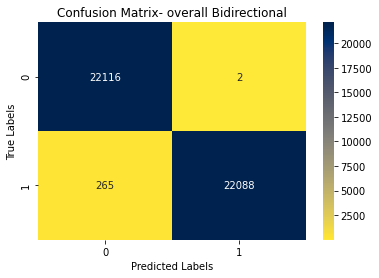

In [ ]:
####CNN-RNN#####
from matplotlib import pyplot as plt
import seaborn as sns
ax = plt.subplot()

cm = ([[22116,     2],
 [  265, 22088]])

sns.heatmap(cm, cmap= "cividis_r", annot = True, ax =ax, fmt='g'); # cmap= "RdYlBu_r" Set3_rSet3_r
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix- overall Bidirectional');


**DNN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
348/348 [==============================] - 6s 11ms/step - loss: 0.4886 - accuracy: 0.8217 - val_loss: 0.2183 - val_accuracy: 0.9933
Epoch 2/100
348/348 [==============================] - 2s 6ms/step - loss: 0.1800 - accuracy: 0.9890 - val_loss: 0.0959 - val_accuracy: 0.9942
Epoch 3/100
348/348 [==============================] - 2s 6ms/step - loss: 0.1077 - accuracy: 0.9920 - val_loss: 0.0620 - val_accuracy: 0.9942
Epoch 4/100
348/348 [==============================] - 3s 8ms/step - loss: 0.0824 - accuracy: 0.9922 - val_loss: 0.0476 - val_accuracy: 0.9942
Epoch 5/100
348/348 [==============================] - 2s 5ms/step - loss: 0.0644 - accuracy: 0.9920 - val_loss: 0.0394 - val_accuracy: 0.9942
Epoch 6/100
348/348 [==============================] - 2s 5ms/step - loss: 0.0545 - accuracy: 0.9918 - val_loss: 0.0339 - val_accuracy: 0.9942
Epoch 7/100
348/348 [==============================] - 2s 4ms/step - loss: 0.0484 - accuracy: 0.9920 - val_loss: 0.0295 - val_accuracy: 0.994

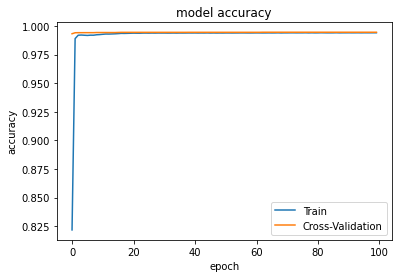

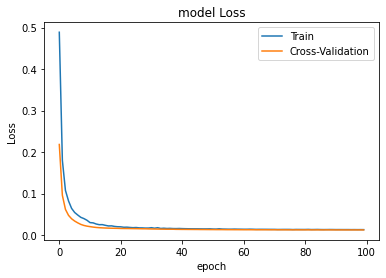

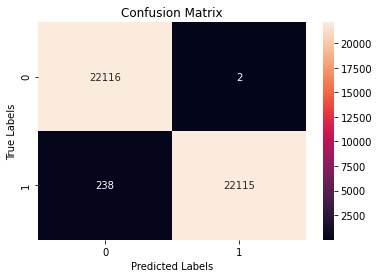

In [ ]:
from keras.layers import Dense, Dropout, Activation, Embedding
from sklearn.metrics import roc_curve, auc
#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(Dense(64,input_shape=(25,1),activation='relu'))  
model.add(Dropout(0.5))
#model.add(Dense(64,activation='relu'))  
#model.add(Dropout(0.5))
model.add(Dense(1))

model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1, shuffle=True)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');



**CNN-RNN**

Epoch 1/100
348/348 [==============================] - 31s 22ms/step - loss: 0.2669 - accuracy: 0.9319 - val_loss: 0.1171 - val_accuracy: 0.9916
Epoch 2/100
348/348 [==============================] - 7s 19ms/step - loss: 0.0258 - accuracy: 0.9932 - val_loss: 0.0174 - val_accuracy: 0.9940
Epoch 3/100
348/348 [==============================] - 7s 19ms/step - loss: 0.0195 - accuracy: 0.9933 - val_loss: 0.0159 - val_accuracy: 0.9935
Epoch 4/100
348/348 [==============================] - 7s 19ms/step - loss: 0.0187 - accuracy: 0.9926 - val_loss: 0.0246 - val_accuracy: 0.9939
Epoch 5/100
348/348 [==============================] - 7s 19ms/step - loss: 0.0188 - accuracy: 0.9925 - val_loss: 0.0187 - val_accuracy: 0.9940
Epoch 6/100
348/348 [==============================] - 7s 19ms/step - loss: 0.0175 - accuracy: 0.9929 - val_loss: 0.0153 - val_accuracy: 0.9940
Epoch 7/100
348/348 [==============================] - 7s 20ms/step - loss: 0.0167 - accuracy: 0.9929 - val_loss: 0.0142 - val_accuracy

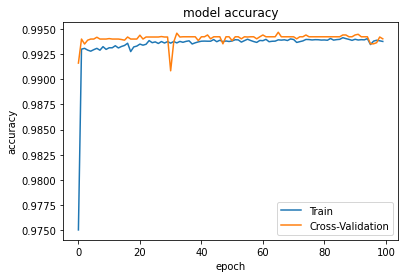

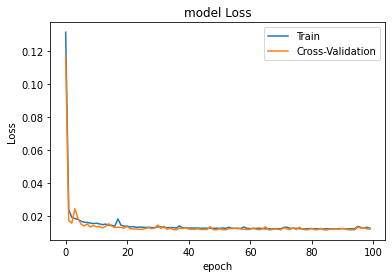

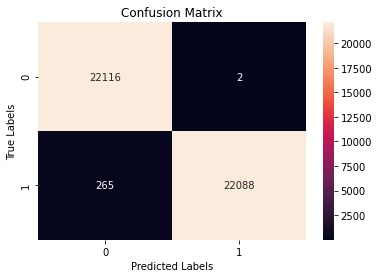

In [ ]:
from __future__ import print_function
import numpy as np


from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
from keras.layers import LSTM, GRU, SimpleRNN


lstm_output_size = 20
epochs = 100
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(SimpleRNN(lstm_output_size))
model.add(Dropout(0.5))


model.add(Dense(2, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
    #])
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=epochs, batch_size=512, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)


print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

#**Unidirectional Packet**

#**Uni-normal**#

In [ ]:
drop_columns = ['ip_src', 'ip_dst','prt_src','prt_dst', 'proto']
#Read Independent and Dependent Features
local_path= '/content/drive/MyDrive/uniflow_features/uniflow_normal.csv'
Uni_normal= pd.read_csv(local_path)
df_Uni_normal = Uni_normal.drop(columns=drop_columns).fillna(-1)

#df_Bi_scan_A.shape
df_Uni_normal.head()

,num_pkts,mean_iat,std_iat,min_iat,max_iat,mean_pkt_len,num_bytes,num_psh_flags,num_rst_flags,num_urg_flags,std_pkt_len,min_pkt_len,max_pkt_len,is_attack
0,7,0.000237,0.000218,0.000035,0.000668,63.428571,444,3,0,0,16.884965,52.0,101.0,0
1,5,0.000203,0.000193,0.000004,0.000432,54.400000,272,1,0,0,3.200000,52.0,60.0,0
2,73552,0.090855,0.060826,0.000002,0.165978,1344.000000,98853888,0,0,0,0.000000,1344.0,1344.0,0
3,7,0.000242,0.000207,0.000013,0.000555,69.000000,483,3,0,0,24.041631,52.0,112.0,0
4,5,0.000243,0.000231,0.000004,0.000484,54.400000,272,1,0,0,3.200000,52.0,60.0,0


In [ ]:
df_Uni_normal.shape

(171836, 14)

In [ ]:
X = df_Uni_normal.drop('is_attack', axis = 1)
y = df_Uni_normal['is_attack']
X.shape, y.shape

((171836, 13), (171836,))

In [ ]:
y.value_counts()

0    171836
Name: is_attack, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y= pd.get_dummies(y1).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 42)

In [ ]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
#THIS PART IS FOR CNN-RNN

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

**LSTM**

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_dim=(26,1)))  
model.add(Dropout(0.5))
model.add(Dense(1))


#model.add(Dense(2, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

#**Uni_Scan_A**#

In [ ]:
drop_columns = ['ip_src', 'ip_dst','prt_src','prt_dst', 'proto']
#Read Independent and Dependent Features
local_path= '/content/drive/MyDrive/uniflow_features/uniflow_scan_A.csv'
Uni_scan_A = pd.read_csv(local_path)
df_Uni_scan_A = Uni_scan_A.drop(columns=drop_columns).fillna(-1)

#df_Bi_scan_A.shape
df_Uni_scan_A.head()

,num_pkts,mean_iat,std_iat,min_iat,max_iat,mean_pkt_len,num_bytes,num_psh_flags,num_rst_flags,num_urg_flags,std_pkt_len,min_pkt_len,max_pkt_len,is_attack
0,5040,0.088777,0.060959,0.000004,0.162855,1344.000000,6773760,0,0,0,0.000000,1344.0,1344.0,0
1,7,0.000344,0.000344,0.000050,0.000973,63.142857,442,3,0,0,16.487472,52.0,100.0,0
2,7,0.000309,0.000302,0.000004,0.000777,69.428571,486,3,0,0,24.904716,52.0,116.0,0
3,5,0.000389,0.000419,0.000004,0.001063,54.400000,272,1,0,0,3.200000,52.0,60.0,0
4,5,0.000312,0.000329,0.000004,0.000807,54.400000,272,1,0,0,3.200000,52.0,60.0,0


In [ ]:
df_Uni_scan_A.shape

(51358, 14)

In [ ]:
X = df_Uni_scan_A.drop('is_attack', axis = 1)
y = df_Uni_scan_A['is_attack']
X.shape, y.shape

((51358, 13), (51358,))

In [ ]:
y.value_counts()

1    39797
0    11561
Name: is_attack, dtype: int64

In [ ]:
X_smote, y_smote = SMOTE().fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y= pd.get_dummies(y1).values

In [ ]:
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y_smote)
Y_smote= pd.get_dummies(y1).values

In [ ]:
Y_smote

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.25, random_state = 42)

In [ ]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
#THIS PART IS FOR CNN-RNN

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
76/76 [==============================] - 3s 15ms/step - loss: 0.6554 - accuracy: 0.7648 - val_loss: 0.6019 - val_accuracy: 0.7748
Epoch 2/100
76/76 [==============================] - 1s 8ms/step - loss: 0.5418 - accuracy: 0.7749 - val_loss: 0.4676 - val_accuracy: 0.7748
Epoch 3/100
76/76 [==============================] - 1s 8ms/step - loss: 0.3942 - accuracy: 0.7949 - val_loss: 0.2787 - val_accuracy: 0.7776
Epoch 4/100
76/76 [==============================] - 1s 8ms/step - loss: 0.2589 - accuracy: 0.8979 - val_loss: 0.1724 - val_accuracy: 0.9935
Epoch 5/100
76/76 [==============================] - 1s 8ms/step - loss: 0.1883 - accuracy: 0.9515 - val_loss: 0.1091 - val_accuracy: 0.9977
Epoch 6/100
76/76 [==============================] - 1s 8ms/step - loss: 0.1425 - accuracy: 0.9684 - val_loss: 0.0698 - val_accuracy: 0.9977
Epoch 7/100
76/76 [==============================] - 1s 8ms/step - loss: 0.1139 - accuracy: 0.9766 - val_loss: 0.0466 - val_accuracy: 0.9977
Epoch 8/100


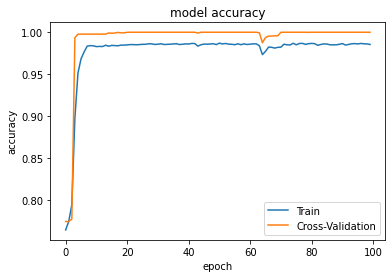

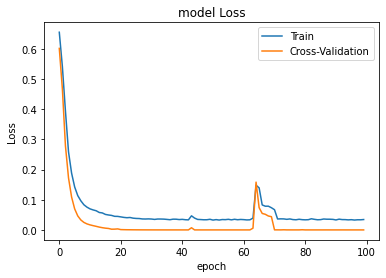

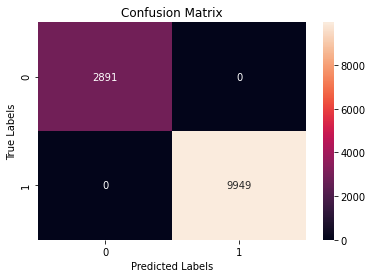

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_dim=X_train.shape[0]))  
model.add(Dropout(0.5))
model.add(Dense(1))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**LSTM**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
117/117 [==============================] - 4s 12ms/step - loss: 0.6576 - accuracy: 0.6034 - val_loss: 0.6028 - val_accuracy: 0.7665
Epoch 2/100
117/117 [==============================] - 1s 8ms/step - loss: 0.5134 - accuracy: 0.8205 - val_loss: 0.3108 - val_accuracy: 0.9991
Epoch 3/100
117/117 [==============================] - 1s 8ms/step - loss: 0.2570 - accuracy: 0.9382 - val_loss: 0.0883 - val_accuracy: 0.9991
Epoch 4/100
117/117 [==============================] - 1s 8ms/step - loss: 0.1589 - accuracy: 0.9476 - val_loss: 0.0420 - val_accuracy: 0.9991
Epoch 5/100
117/117 [==============================] - 1s 8ms/step - loss: 0.1191 - accuracy: 0.9682 - val_loss: 0.0242 - val_accuracy: 0.9991
Epoch 6/100
117/117 [==============================] - 1s 8ms/step - loss: 0.0956 - accuracy: 0.9687 - val_loss: 0.0153 - val_accuracy: 0.9991
Epoch 7/100
117/117 [==============================] - 1s 8ms/step - loss: 0.0803 - accuracy: 0.9688 - val_loss: 0.0103 - val_accuracy: 0.999

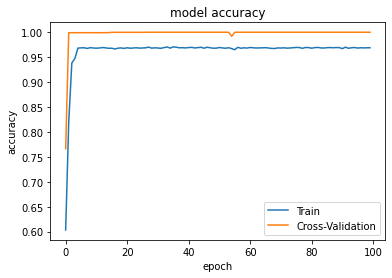

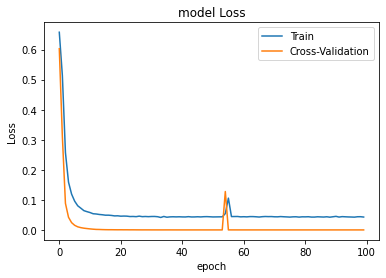

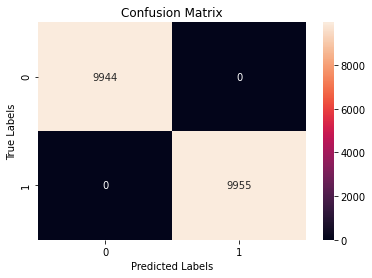

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_dim=X_train.shape[0]))  
model.add(Dropout(0.5))
model.add(Dense(1))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**DNN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
125/125 [==============================] - 2s 6ms/step - loss: 0.3268 - accuracy: 0.9524 - val_loss: 0.0224 - val_accuracy: 0.9994
Epoch 2/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0225 - accuracy: 0.9990 - val_loss: 0.0083 - val_accuracy: 0.9994
Epoch 3/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0137 - accuracy: 0.9992 - val_loss: 0.0054 - val_accuracy: 0.9994
Epoch 4/100
125/125 [==============================] - 1s 5ms/step - loss: 0.0088 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 5/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0068 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 6/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0045 - accuracy: 0.9994 - val_loss: 0.0021 - val_accuracy: 0.9994
Epoch 7/100
125/125 [==============================] - 1s 4ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0015 - val_accuracy: 0.9994

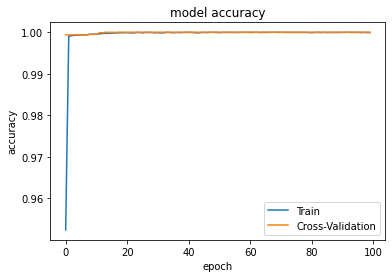

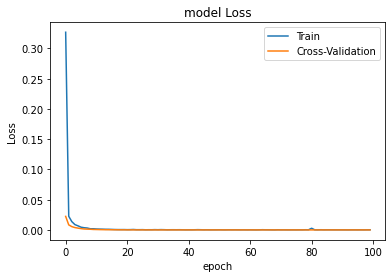

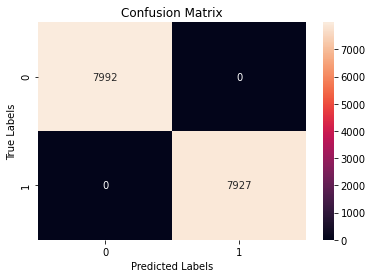

In [ ]:
from keras.layers import Dense, Dropout, Activation, Embedding



# 1. define the network
model = Sequential()
model.add(Dense(64,input_shape=(13,1),activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(1))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    
print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**CNN-RNN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
59/59 [==============================] - 26s 41ms/step - loss: 0.5029 - accuracy: 0.7587 - val_loss: 0.0828 - val_accuracy: 0.9991
Epoch 2/100
59/59 [==============================] - 2s 26ms/step - loss: 0.0204 - accuracy: 0.9986 - val_loss: 0.0317 - val_accuracy: 0.9991
Epoch 3/100
59/59 [==============================] - 2s 28ms/step - loss: 0.0132 - accuracy: 0.9991 - val_loss: 0.0132 - val_accuracy: 0.9991
Epoch 4/100
59/59 [==============================] - 2s 26ms/step - loss: 0.0103 - accuracy: 0.9992 - val_loss: 0.0075 - val_accuracy: 0.9991
Epoch 5/100
59/59 [==============================] - 2s 27ms/step - loss: 0.0092 - accuracy: 0.9992 - val_loss: 0.0057 - val_accuracy: 0.9991
Epoch 6/100
59/59 [==============================] - 2s 28ms/step - loss: 0.0077 - accuracy: 0.9993 - val_loss: 0.0051 - val_accuracy: 0.9991
Epoch 7/100
59/59 [==============================] - 2s 27ms/step - loss: 0.0076 - accuracy: 0.9990 - val_loss: 0.0045 - val_accuracy: 0.9991
Epoch

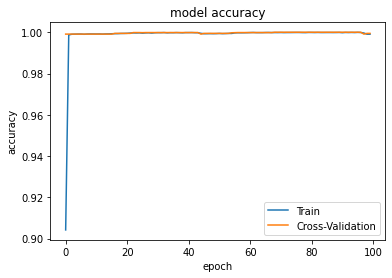

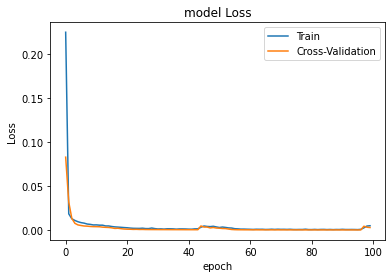

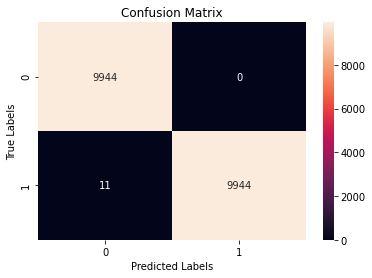

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

from keras.layers import LSTM, GRU, SimpleRNN

lstm_output_size = 20
epochs = 100
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(SimpleRNN(lstm_output_size))
model.add(Dropout(0.5))


model.add(Dense(2, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
    #])
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=epochs, batch_size=1024, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)

print(confusion_matrix(y_test_class, y_pred_class))
print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
63/63 [==============================] - 4s 33ms/step - loss: 0.5023 - accuracy: 0.7415 - val_loss: 0.2713 - val_accuracy: 0.9990
Epoch 2/100
63/63 [==============================] - 1s 23ms/step - loss: 0.0284 - accuracy: 0.9989 - val_loss: 0.1348 - val_accuracy: 0.9990
Epoch 3/100
63/63 [==============================] - 1s 23ms/step - loss: 0.0183 - accuracy: 0.9991 - val_loss: 0.0631 - val_accuracy: 0.9990
Epoch 4/100
63/63 [==============================] - 1s 24ms/step - loss: 0.0143 - accuracy: 0.9992 - val_loss: 0.0303 - val_accuracy: 0.9990
Epoch 5/100
63/63 [==============================] - 1s 24ms/step - loss: 0.0112 - accuracy: 0.9993 - val_loss: 0.0155 - val_accuracy: 0.9990
Epoch 6/100
63/63 [==============================] - 1s 23ms/step - loss: 0.0097 - accuracy: 0.9992 - val_loss: 0.0091 - val_accuracy: 0.9990
Epoch 7/100
63/63 [==============================] - 1s 24ms/step - loss: 0.0085 - accuracy: 0.9993 - val_loss: 0.0067 - val_accuracy: 0.9990
Epoch 

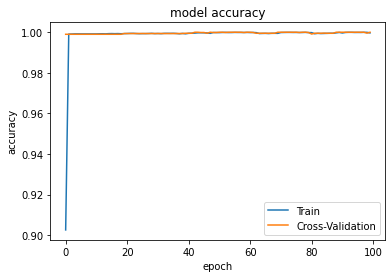

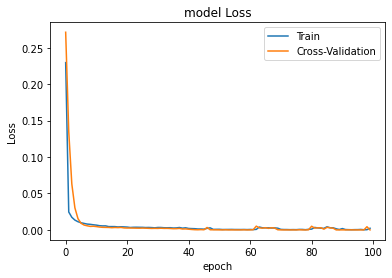

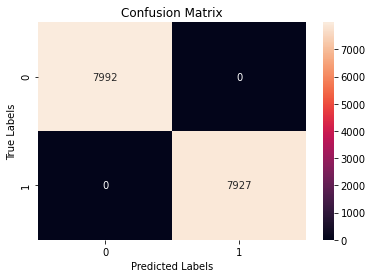

In [ ]:

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

from keras.layers import LSTM, GRU, SimpleRNN

lstm_output_size = 20
epochs = 100
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(SimpleRNN(lstm_output_size))
model.add(Dropout(0.5))


model.add(Dense(2, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
    #])
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=epochs, batch_size=1024, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)

print(confusion_matrix(y_test_class, y_pred_class))
print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

#**Uni-Scan-Su**#


In [ ]:
drop_columns = ['ip_src', 'ip_dst','prt_src','prt_dst', 'proto']
#Read Independent and Dependent Features
local_path= '/content/drive/MyDrive/uniflow_features/uniflow_scan_sU.csv'
Uni_scan_Su = pd.read_csv(local_path)
df_Uni_scan_Su = Uni_scan_Su.drop(columns=drop_columns).fillna(-1)

#df_Bi_scan_Su.shape
df_Uni_scan_Su.head()

,num_pkts,mean_iat,std_iat,min_iat,max_iat,mean_pkt_len,num_bytes,num_psh_flags,num_rst_flags,num_urg_flags,std_pkt_len,min_pkt_len,max_pkt_len,is_attack
0,14618,0.091413,0.060809,0.000002,0.167812,1344.000000,19646592,0,0,0,0.000000,1344.0,1344.0,0
1,7,0.001523,0.001327,0.000142,0.003380,65.857143,461,3,0,0,19.245991,52.0,102.0,0
2,5,0.001555,0.001531,0.000025,0.003133,54.400000,272,1,0,0,3.200000,52.0,60.0,0
3,7,0.000356,0.000359,0.000005,0.000945,69.857143,489,3,0,0,25.614887,52.0,118.0,0
4,5,0.000386,0.000393,0.000005,0.000907,54.400000,272,1,0,0,3.200000,52.0,60.0,0


In [ ]:
df_Uni_scan_Su.shape

(56845, 14)

In [ ]:
X = df_Uni_scan_Su.drop('is_attack', axis = 1)
y = df_Uni_scan_Su['is_attack']
X.shape, y.shape

((56845, 13), (56845,))

In [ ]:
y.value_counts()

0    34409
1    22436
Name: is_attack, dtype: int64

In [ ]:
X_smote, y_smote = SMOTE().fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y_smote)
Y_smote= pd.get_dummies(y1).values

In [ ]:
Y_smote

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.2, random_state = 42)

In [ ]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
#THIS PART IS FOR CNN-RNN

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

**LSTM**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
108/108 [==============================] - 4s 13ms/step - loss: 0.6549 - accuracy: 0.7374 - val_loss: 0.5793 - val_accuracy: 0.9886
Epoch 2/100
108/108 [==============================] - 1s 8ms/step - loss: 0.4576 - accuracy: 0.9059 - val_loss: 0.2882 - val_accuracy: 0.9945
Epoch 3/100
108/108 [==============================] - 1s 8ms/step - loss: 0.2624 - accuracy: 0.9360 - val_loss: 0.1373 - val_accuracy: 0.9926
Epoch 4/100
108/108 [==============================] - 1s 8ms/step - loss: 0.1800 - accuracy: 0.9629 - val_loss: 0.0789 - val_accuracy: 0.9947
Epoch 5/100
108/108 [==============================] - 1s 8ms/step - loss: 0.1420 - accuracy: 0.9639 - val_loss: 0.0537 - val_accuracy: 0.9947
Epoch 6/100
108/108 [==============================] - 1s 8ms/step - loss: 0.1237 - accuracy: 0.9617 - val_loss: 0.0424 - val_accuracy: 0.9947
Epoch 7/100
108/108 [==============================] - 1s 8ms/step - loss: 0.1082 - accuracy: 0.9631 - val_loss: 0.0354 - val_accuracy: 0.994

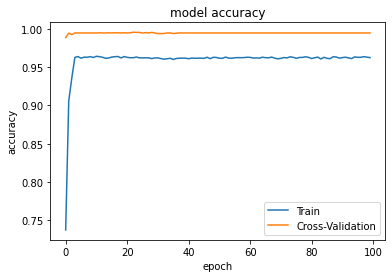

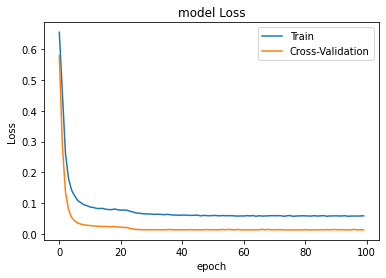

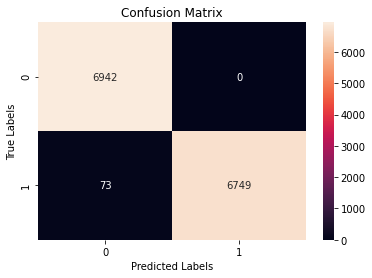

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_dim=X_train.shape[0]))  
model.add(Dropout(0.5))
model.add(Dense(1))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**DNN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
108/108 [==============================] - 1s 5ms/step - loss: 0.1873 - accuracy: 0.9531 - val_loss: 0.0690 - val_accuracy: 0.9938
Epoch 2/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0584 - accuracy: 0.9923 - val_loss: 0.0342 - val_accuracy: 0.9943
Epoch 3/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0433 - accuracy: 0.9923 - val_loss: 0.0212 - val_accuracy: 0.9943
Epoch 4/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0257 - accuracy: 0.9927 - val_loss: 0.0171 - val_accuracy: 0.9943
Epoch 5/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0223 - accuracy: 0.9928 - val_loss: 0.0154 - val_accuracy: 0.9943
Epoch 6/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0147 - val_accuracy: 0.9943
Epoch 7/100
108/108 [==============================] - 0s 4ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0144 - val_accuracy: 0.9943

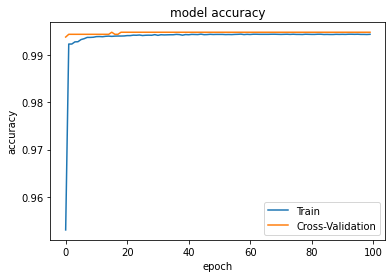

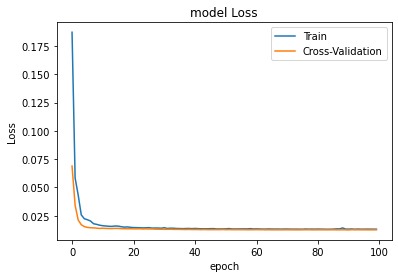

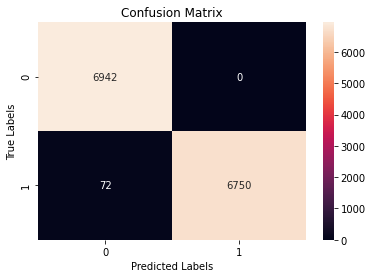

In [ ]:
from keras.layers import Dense, Dropout, Activation, Embedding



# 1. define the network
model = Sequential()
model.add(Dense(64,input_shape=(13,1),activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(1))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    
print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**CNN-RNN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
54/54 [==============================] - 25s 40ms/step - loss: 0.3105 - accuracy: 0.8695 - val_loss: 0.2395 - val_accuracy: 0.9919
Epoch 2/100
54/54 [==============================] - 1s 23ms/step - loss: 0.0607 - accuracy: 0.9910 - val_loss: 0.1379 - val_accuracy: 0.9926
Epoch 3/100
54/54 [==============================] - 1s 23ms/step - loss: 0.0415 - accuracy: 0.9930 - val_loss: 0.0791 - val_accuracy: 0.9945
Epoch 4/100
54/54 [==============================] - 1s 24ms/step - loss: 0.0358 - accuracy: 0.9922 - val_loss: 0.0473 - val_accuracy: 0.9945
Epoch 5/100
54/54 [==============================] - 1s 24ms/step - loss: 0.0342 - accuracy: 0.9916 - val_loss: 0.0331 - val_accuracy: 0.9945
Epoch 6/100
54/54 [==============================] - 1s 24ms/step - loss: 0.0306 - accuracy: 0.9921 - val_loss: 0.0263 - val_accuracy: 0.9947
Epoch 7/100
54/54 [==============================] - 1s 24ms/step - loss: 0.0280 - accuracy: 0.9920 - val_loss: 0.0223 - val_accuracy: 0.9947
Epoch

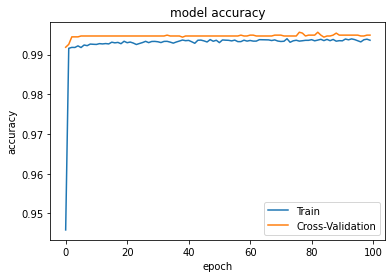

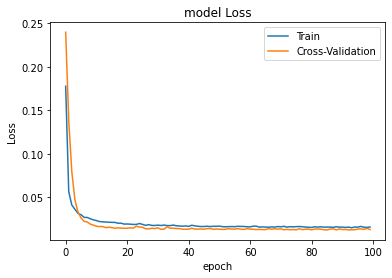

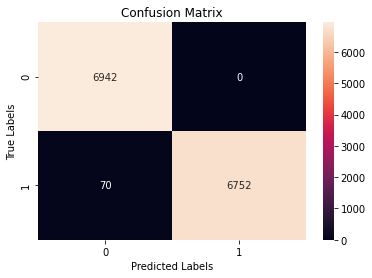

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

from keras.layers import LSTM, GRU, SimpleRNN

lstm_output_size = 20
epochs = 100
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(SimpleRNN(lstm_output_size))
model.add(Dropout(0.5))


model.add(Dense(2, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
    #])
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=epochs, batch_size=1024, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)

print(confusion_matrix(y_test_class, y_pred_class))
print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

#**Uni-MQTT**#

In [ ]:
drop_columns = ['ip_src', 'ip_dst','prt_src','prt_dst', 'proto']
#Read Independent and Dependent Features
local_path= '/content/drive/MyDrive/uniflow_features/uniflow_mqtt_bruteforce.csv'
Uni_mqtt= pd.read_csv(local_path)
df_Uni_mqtt = Uni_mqtt.drop(columns=drop_columns).fillna(-1)

#df_Bi_scan_A.shape
df_Uni_mqtt.head()

,num_pkts,mean_iat,std_iat,min_iat,max_iat,mean_pkt_len,num_bytes,num_psh_flags,num_rst_flags,num_urg_flags,std_pkt_len,min_pkt_len,max_pkt_len,is_attack
0,2,0.000008,0.000000,0.000008,0.000008,83.0,166,0,0,0,0.0,83.0,83.0,1
1,2,0.000016,0.000000,0.000016,0.000016,83.0,166,0,0,0,0.0,83.0,83.0,1
2,2,0.000005,0.000000,0.000005,0.000005,83.0,166,0,0,0,0.0,83.0,83.0,1
3,23917,0.090139,0.060855,0.000002,0.166959,1344.0,32144448,0,0,0,0.0,1344.0,1344.0,0
4,1,0.000000,0.000000,0.000000,0.000000,60.0,60,0,0,0,0.0,60.0,60.0,0


In [ ]:
df_Uni_mqtt.shape

(33079, 14)

In [ ]:
X = df_Uni_mqtt.drop('is_attack', axis = 1)
y = df_Uni_mqtt['is_attack']
X.shape, y.shape

((33079, 13), (33079,))

In [ ]:
y.value_counts()

1    28874
0     4205
Name: is_attack, dtype: int64

In [ ]:
X_smote, y_smote = SMOTE().fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y_smote)
Y_smote= pd.get_dummies(y1).values

In [ ]:
Y_smote

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [ ]:
Y_smote.shape

(57748, 2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.2, random_state = 42)

In [ ]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
#THIS PART IS FOR CNN-RNN

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

**LSTM**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
91/91 [==============================] - 4s 15ms/step - loss: 0.6735 - accuracy: 0.5853 - val_loss: 0.6135 - val_accuracy: 0.8609
Epoch 2/100
91/91 [==============================] - 1s 9ms/step - loss: 0.4780 - accuracy: 0.8077 - val_loss: 0.2677 - val_accuracy: 0.9867
Epoch 3/100
91/91 [==============================] - 1s 10ms/step - loss: 0.2761 - accuracy: 0.9220 - val_loss: 0.1271 - val_accuracy: 0.9870
Epoch 4/100
91/91 [==============================] - 1s 11ms/step - loss: 0.1951 - accuracy: 0.9382 - val_loss: 0.0787 - val_accuracy: 0.9879
Epoch 5/100
91/91 [==============================] - 1s 10ms/step - loss: 0.1560 - accuracy: 0.9525 - val_loss: 0.0616 - val_accuracy: 0.9887
Epoch 6/100
91/91 [==============================] - 1s 11ms/step - loss: 0.1365 - accuracy: 0.9574 - val_loss: 0.0546 - val_accuracy: 0.9895
Epoch 7/100
91/91 [==============================] - 1s 10ms/step - loss: 0.1297 - accuracy: 0.9570 - val_loss: 0.0519 - val_accuracy: 0.9900
Epoch 8

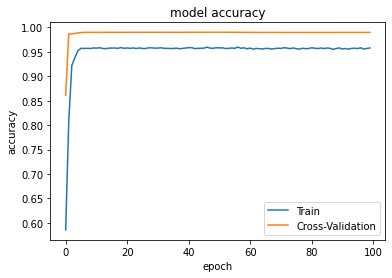

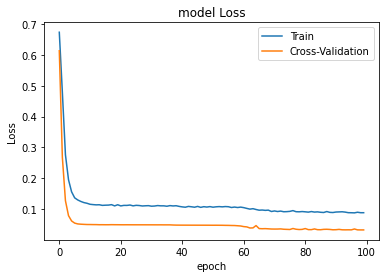

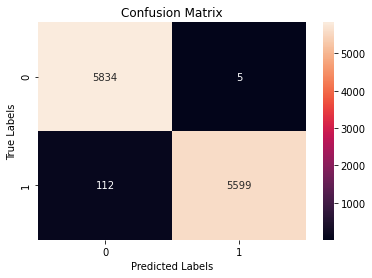

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_dim=(12,1)))  
model.add(Dropout(0.5))
model.add(Dense(1))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**DNN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
91/91 [==============================] - 2s 8ms/step - loss: 0.2089 - accuracy: 0.9401 - val_loss: 0.0683 - val_accuracy: 0.9890
Epoch 2/100
91/91 [==============================] - 0s 5ms/step - loss: 0.0812 - accuracy: 0.9876 - val_loss: 0.0456 - val_accuracy: 0.9899
Epoch 3/100
91/91 [==============================] - 0s 5ms/step - loss: 0.0666 - accuracy: 0.9881 - val_loss: 0.0426 - val_accuracy: 0.9902
Epoch 4/100
91/91 [==============================] - 1s 6ms/step - loss: 0.0602 - accuracy: 0.9882 - val_loss: 0.0415 - val_accuracy: 0.9902
Epoch 5/100
91/91 [==============================] - 1s 6ms/step - loss: 0.0567 - accuracy: 0.9883 - val_loss: 0.0396 - val_accuracy: 0.9902
Epoch 6/100
91/91 [==============================] - 0s 5ms/step - loss: 0.0577 - accuracy: 0.9883 - val_loss: 0.0379 - val_accuracy: 0.9902
Epoch 7/100
91/91 [==============================] - 0s 4ms/step - loss: 0.0516 - accuracy: 0.9883 - val_loss: 0.0363 - val_accuracy: 0.9902
Epoch 8/100
9

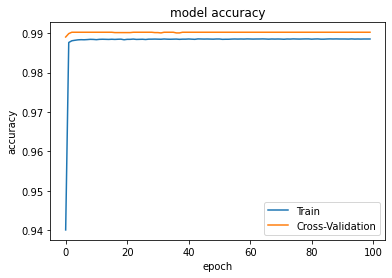

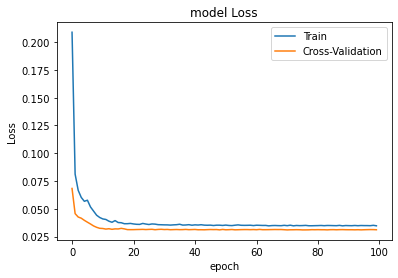

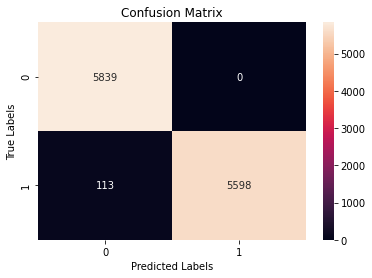

In [ ]:
from keras.layers import Dense, Dropout, Activation, Embedding



# 1. define the network
model = Sequential()
model.add(Dense(64,input_shape=(13,1),activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(1))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    
print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**CNN-RNN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
46/46 [==============================] - 28s 45ms/step - loss: 0.5668 - accuracy: 0.7540 - val_loss: 0.1728 - val_accuracy: 0.9874
Epoch 2/100
46/46 [==============================] - 1s 25ms/step - loss: 0.1078 - accuracy: 0.9814 - val_loss: 0.1077 - val_accuracy: 0.9878
Epoch 3/100
46/46 [==============================] - 1s 27ms/step - loss: 0.0903 - accuracy: 0.9864 - val_loss: 0.0896 - val_accuracy: 0.9878
Epoch 4/100
46/46 [==============================] - 1s 30ms/step - loss: 0.0855 - accuracy: 0.9863 - val_loss: 0.0768 - val_accuracy: 0.9893
Epoch 5/100
46/46 [==============================] - 1s 30ms/step - loss: 0.0736 - accuracy: 0.9882 - val_loss: 0.0687 - val_accuracy: 0.9899
Epoch 6/100
46/46 [==============================] - 1s 27ms/step - loss: 0.0745 - accuracy: 0.9874 - val_loss: 0.0625 - val_accuracy: 0.9902
Epoch 7/100
46/46 [==============================] - 1s 28ms/step - loss: 0.0682 - accuracy: 0.9888 - val_loss: 0.0572 - val_accuracy: 0.9902
Epoch

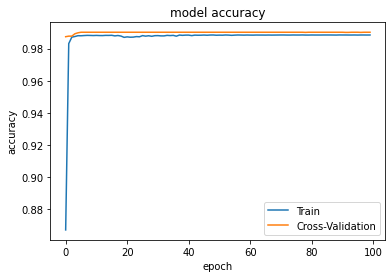

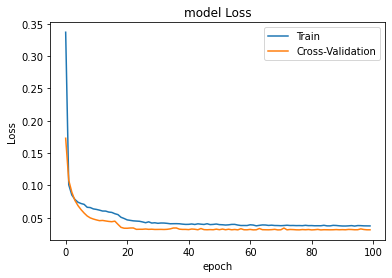

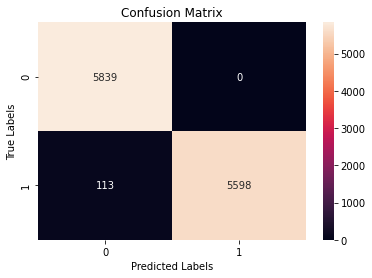

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

from keras.layers import LSTM, GRU, SimpleRNN

lstm_output_size = 20
epochs = 100
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = (13,1)))
model.add(BatchNormalization())
model.add(SimpleRNN(lstm_output_size))
model.add(Dropout(0.5))


model.add(Dense(2, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
    #])
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=epochs, batch_size=1024, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)

print(confusion_matrix(y_test_class, y_pred_class))
print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

#**Uni-overall**#

In [ ]:
drop_columns = ['ip_src', 'ip_dst','prt_src','prt_dst', 'proto']
#Read Independent and Dependent Features
local_path= '/content/drive/MyDrive/uniflow_features'
all_files = gl.glob(local_path + "/*.csv")
df_uni= pd.concat((pd.read_csv(f) for f in all_files))

df_Uni= df_uni.drop(columns=drop_columns).fillna(-1)

df_Uni.shape

(313118, 14)

In [ ]:
df_Uni.head()

,num_pkts,mean_iat,std_iat,min_iat,max_iat,mean_pkt_len,num_bytes,num_psh_flags,num_rst_flags,num_urg_flags,std_pkt_len,min_pkt_len,max_pkt_len,is_attack
0,7,0.000237,0.000218,0.000035,0.000668,63.428571,444,3,0,0,16.884965,52.0,101.0,0
1,5,0.000203,0.000193,0.000004,0.000432,54.400000,272,1,0,0,3.200000,52.0,60.0,0
2,73552,0.090855,0.060826,0.000002,0.165978,1344.000000,98853888,0,0,0,0.000000,1344.0,1344.0,0
3,7,0.000242,0.000207,0.000013,0.000555,69.000000,483,3,0,0,24.041631,52.0,112.0,0
4,5,0.000243,0.000231,0.000004,0.000484,54.400000,272,1,0,0,3.200000,52.0,60.0,0


In [ ]:
X = df_Uni.drop('is_attack', axis = 1)
y = df_Uni['is_attack']
X.shape, y.shape

((313118, 13), (313118,))

In [ ]:
y.value_counts()

0    222011
1     91107
Name: is_attack, dtype: int64

In [ ]:
X_smote, y_smote = SMOTE().fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y_smote)
Y_smote= pd.get_dummies(y1).values

In [ ]:
Y_smote

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.20, random_state = 42)

In [ ]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
#THIS PART IS FOR CNN-RNN

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

**LSTM**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
694/694 [==============================] - 39s 53ms/step - loss: 0.1253 - accuracy: 0.9674 - val_loss: 0.0258 - val_accuracy: 0.9932
Epoch 2/100
694/694 [==============================] - 36s 52ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0167 - val_accuracy: 0.9942
Epoch 3/100
694/694 [==============================] - 36s 52ms/step - loss: 0.0164 - accuracy: 0.9941 - val_loss: 0.0150 - val_accuracy: 0.9946
Epoch 4/100
694/694 [==============================] - 36s 52ms/step - loss: 0.0155 - accuracy: 0.9943 - val_loss: 0.0142 - val_accuracy: 0.9946
Epoch 5/100
694/694 [==============================] - 36s 52ms/step - loss: 0.0151 - accuracy: 0.9944 - val_loss: 0.0138 - val_accuracy: 0.9947
Epoch 6/100
694/694 [==============================] - 36s 52ms/step - loss: 0.0149 - accuracy: 0.9945 - val_loss: 0.0141 - val_accuracy: 0.9949
Epoch 7/100
694/694 [==============================] - 37s 53ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0140 - val_ac

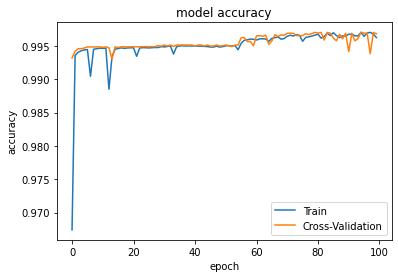

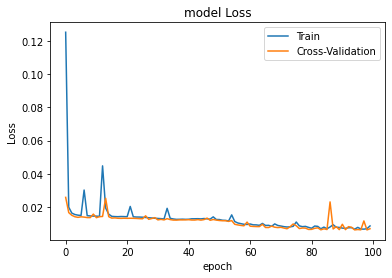

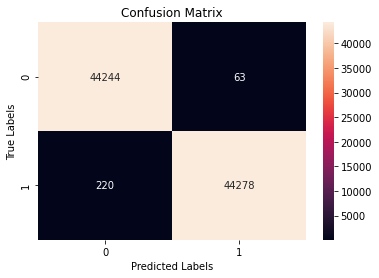

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(64,input_dim=X_train.shape[0]))  
model.add(Dropout(0.1))
model.add(Dense(1))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**DNN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
694/694 [==============================] - 3s 3ms/step - loss: 0.5970 - accuracy: 0.7891 - val_loss: 0.4200 - val_accuracy: 0.9943
Epoch 2/100
694/694 [==============================] - 2s 3ms/step - loss: 0.2727 - accuracy: 0.9935 - val_loss: 0.1502 - val_accuracy: 0.9941
Epoch 3/100
694/694 [==============================] - 2s 3ms/step - loss: 0.1200 - accuracy: 0.9940 - val_loss: 0.0775 - val_accuracy: 0.9943
Epoch 4/100
694/694 [==============================] - 2s 3ms/step - loss: 0.0764 - accuracy: 0.9941 - val_loss: 0.0544 - val_accuracy: 0.9944
Epoch 5/100
694/694 [==============================] - 2s 3ms/step - loss: 0.0598 - accuracy: 0.9942 - val_loss: 0.0430 - val_accuracy: 0.9945
Epoch 6/100
694/694 [==============================] - 2s 3ms/step - loss: 0.0490 - accuracy: 0.9943 - val_loss: 0.0352 - val_accuracy: 0.9945
Epoch 7/100
694/694 [==============================] - 2s 3ms/step - loss: 0.0416 - accuracy: 0.9943 - val_loss: 0.0291 - val_accuracy: 0.9945

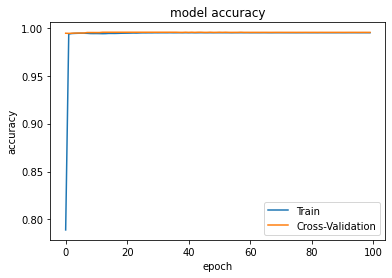

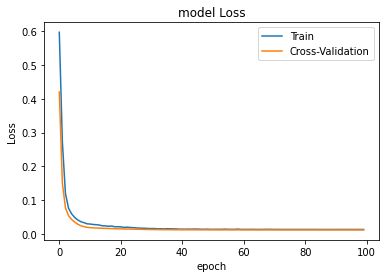

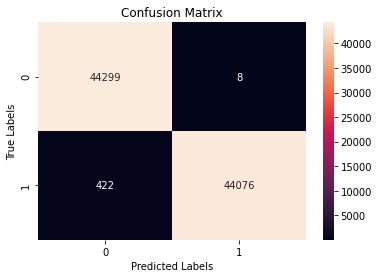

In [ ]:
from keras.layers import Dense, Dropout, Activation, Embedding
from sklearn.metrics import roc_curve, auc
#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(Dense(64,input_shape=(13,1),activation='relu'))  
model.add(Dropout(0.5))
#model.add(Dense(64,activation='relu'))  
#model.add(Dropout(0.5))
model.add(Dense(1))

model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1, shuffle=True)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');


**CNN-RNN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
347/347 [==============================] - 32s 27ms/step - loss: 0.3007 - accuracy: 0.8601 - val_loss: 0.0252 - val_accuracy: 0.9945
Epoch 2/100
347/347 [==============================] - 8s 24ms/step - loss: 0.0306 - accuracy: 0.9927 - val_loss: 0.0191 - val_accuracy: 0.9945
Epoch 3/100
347/347 [==============================] - 8s 24ms/step - loss: 0.0220 - accuracy: 0.9939 - val_loss: 0.0171 - val_accuracy: 0.9946
Epoch 4/100
347/347 [==============================] - 8s 24ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0134 - val_accuracy: 0.9947
Epoch 5/100
347/347 [==============================] - 8s 24ms/step - loss: 0.0176 - accuracy: 0.9939 - val_loss: 0.0131 - val_accuracy: 0.9949
Epoch 6/100
347/347 [==============================] - 8s 24ms/step - loss: 0.0168 - accuracy: 0.9939 - val_loss: 0.0131 - val_accuracy: 0.9947
Epoch 7/100
347/347 [==============================] - 8s 24ms/step - loss: 0.0168 - accuracy: 0.9941 - val_loss: 0.0132 - val_accuracy

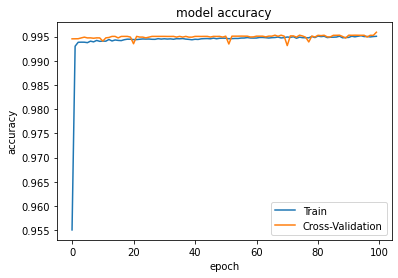

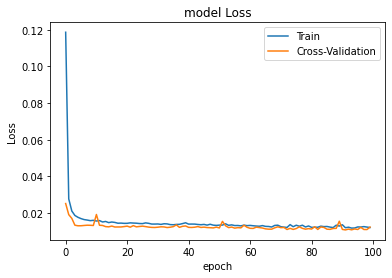

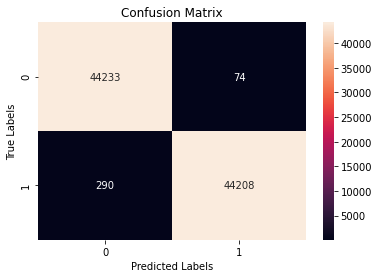

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

from keras.layers import LSTM, GRU, SimpleRNN

lstm_output_size = 20
epochs = 100
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(SimpleRNN(lstm_output_size))
model.add(Dropout(0.5))


model.add(Dense(2, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
    #])
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=epochs, batch_size=1024, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)

print(confusion_matrix(y_test_class, y_pred_class))
print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

#**Packet-Level**#

#**Packet-Scan-A**#

In [ ]:
drop_columns =  ['timestamp', 'src_ip', 'dst_ip', 'protocol']
#Read Independent and Dependent Features
local_path= '/content/drive/MyDrive/packet/scan_A.csv'
Packet_scan_A = pd.read_csv(local_path)
Packet_scan_A = Packet_scan_A.drop(columns=drop_columns).fillna(-1)
df_Packet_scan_A = Packet_scan_A[Packet_scan_A.columns.drop(list(Packet_scan_A.filter(regex='mqtt')))]
df_Packet_scan_A.head()


,ttl,ip_len,ip_flag_df,ip_flag_mf,ip_flag_rb,src_port,dst_port,tcp_flag_res,tcp_flag_ns,tcp_flag_cwr,tcp_flag_ecn,tcp_flag_urg,tcp_flag_ack,tcp_flag_push,tcp_flag_reset,tcp_flag_syn,tcp_flag_fin,is_attack
0,64.0,1344.0,1.0,0.0,0.0,47103,1234,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
1,64.0,60.0,1.0,0.0,0.0,32968,1883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,64.0,60.0,1.0,0.0,0.0,42990,1883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,63.0,60.0,1.0,0.0,0.0,1883,32968,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,63.0,60.0,1.0,0.0,0.0,1883,42990,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [ ]:
df_Packet_scan_A.shape

(111392, 18)

In [ ]:
X = df_Packet_scan_A.drop('is_attack', axis = 1)
y = df_Packet_scan_A['is_attack']
X.shape, y.shape

((111392, 17), (111392,))

In [ ]:
y.value_counts()

0    70768
1    40624
Name: is_attack, dtype: int64

In [ ]:
X_smote, y_smote = SMOTE().fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y_smote)
Y_smote= pd.get_dummies(y1).values

In [ ]:
Y_smote.shape

(141536, 2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.25, random_state = 42)

In [ ]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
#THIS PART IS FOR CNN-RNN

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

**LSTM**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
208/208 [==============================] - 6s 16ms/step - loss: 0.6340 - accuracy: 0.6783 - val_loss: 0.4755 - val_accuracy: 0.7503
Epoch 2/100
208/208 [==============================] - 3s 13ms/step - loss: 0.3466 - accuracy: 0.8438 - val_loss: 0.2214 - val_accuracy: 0.9442
Epoch 3/100
208/208 [==============================] - 3s 12ms/step - loss: 0.1839 - accuracy: 0.9339 - val_loss: 0.1149 - val_accuracy: 0.9693
Epoch 4/100
208/208 [==============================] - 2s 12ms/step - loss: 0.0974 - accuracy: 0.9755 - val_loss: 0.0492 - val_accuracy: 0.9884
Epoch 5/100
208/208 [==============================] - 3s 13ms/step - loss: 0.0454 - accuracy: 0.9884 - val_loss: 0.0146 - val_accuracy: 0.9981
Epoch 6/100
208/208 [==============================] - 3s 12ms/step - loss: 0.0231 - accuracy: 0.9938 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 7/100
208/208 [==============================] - 3s 13ms/step - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.0030 - val_accuracy:

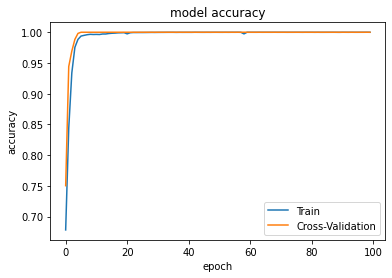

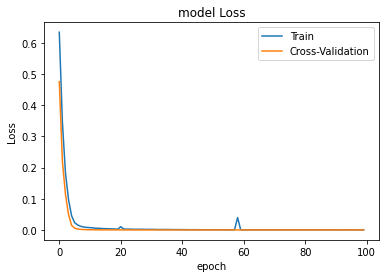

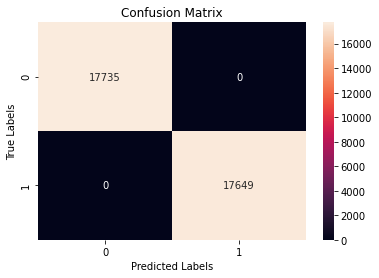

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_dim=25))  
model.add(Dropout(0.1))
model.add(Dense(1))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**DNN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
208/208 [==============================] - 2s 6ms/step - loss: 0.1101 - accuracy: 0.9646 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 2/100
208/208 [==============================] - 1s 5ms/step - loss: 0.0076 - accuracy: 0.9987 - val_loss: 7.1671e-04 - val_accuracy: 0.9996
Epoch 3/100
208/208 [==============================] - 1s 5ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 3.2130e-04 - val_accuracy: 0.9999
Epoch 4/100
208/208 [==============================] - 1s 5ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 1.1770e-04 - val_accuracy: 0.9999
Epoch 5/100
208/208 [==============================] - 1s 5ms/step - loss: 0.0052 - accuracy: 0.9998 - val_loss: 5.3619e-05 - val_accuracy: 1.0000
Epoch 6/100
208/208 [==============================] - 1s 5ms/step - loss: 0.0010 - accuracy: 0.9999 - val_loss: 1.8780e-05 - val_accuracy: 1.0000
Epoch 7/100
208/208 [==============================] - 1s 5ms/step - loss: 3.6798e-04 - accuracy: 1.0000 - val_loss: 2.047

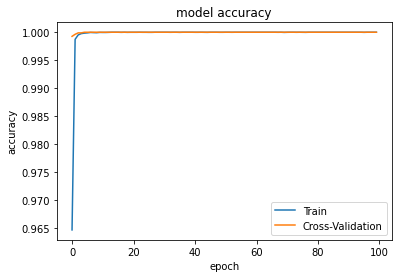

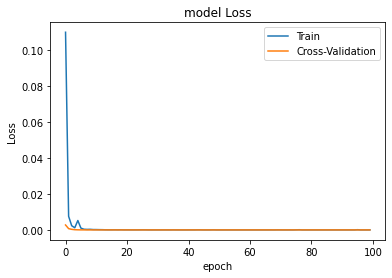

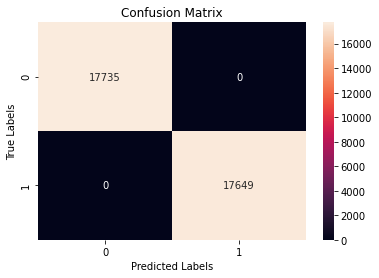

In [ ]:
from keras.layers import Dense, Dropout, Activation, Embedding



# 1. define the network
model = Sequential()
model.add(Dense(64,input_shape=(25,1),activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(1))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    
print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**CNN-RNN**

Epoch 1/100
104/104 [==============================] - 30s 46ms/step - loss: 0.2910 - accuracy: 0.8911 - val_loss: 1.0252 - val_accuracy: 0.7486
Epoch 2/100
104/104 [==============================] - 4s 34ms/step - loss: 0.0226 - accuracy: 0.9955 - val_loss: 0.6171 - val_accuracy: 0.7503
Epoch 3/100
104/104 [==============================] - 4s 36ms/step - loss: 0.0101 - accuracy: 0.9981 - val_loss: 0.1418 - val_accuracy: 0.9755
Epoch 4/100
104/104 [==============================] - 4s 38ms/step - loss: 0.0093 - accuracy: 0.9982 - val_loss: 0.0132 - val_accuracy: 0.9980
Epoch 5/100
104/104 [==============================] - 4s 36ms/step - loss: 0.0099 - accuracy: 0.9980 - val_loss: 0.0090 - val_accuracy: 0.9980
Epoch 6/100
104/104 [==============================] - 4s 37ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 6.6483e-04 - val_accuracy: 0.9999
Epoch 7/100
104/104 [==============================] - 4s 36ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 3.4913e-05 - val_

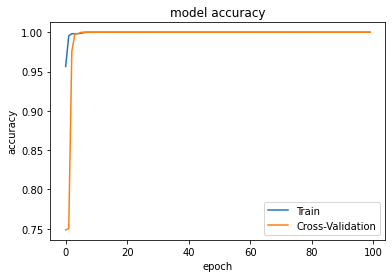

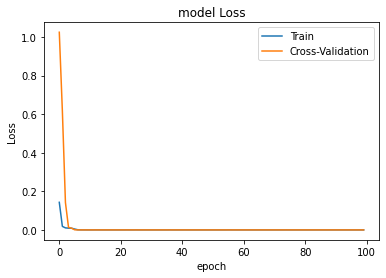

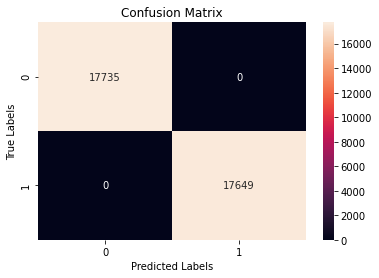

In [ ]:

import numpy as np


from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

from keras.layers import LSTM, GRU, SimpleRNN

lstm_output_size = 20
epochs = 100
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(SimpleRNN(lstm_output_size))
model.add(Dropout(0.2))


model.add(Dense(2, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
    #])
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=epochs, batch_size=1024, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)

print(confusion_matrix(y_test_class, y_pred_class))
print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

#**Packet-Scan-Su**#

In [ ]:
drop_columns =  ['timestamp', 'src_ip', 'dst_ip', 'protocol']
#Read Independent and Dependent Features
local_path= '/content/drive/MyDrive/packet/scan_sU.csv'
Packet_scan_sU = pd.read_csv(local_path)
Packet_scan_sU = Packet_scan_sU.drop(columns=drop_columns).fillna(-1)
df_Packet_scan_sU = Packet_scan_sU[Packet_scan_sU.columns.drop(list(Packet_scan_sU.filter(regex='mqtt')))]
df_Packet_scan_sU.head()

,ttl,ip_len,ip_flag_df,ip_flag_mf,ip_flag_rb,src_port,dst_port,tcp_flag_res,tcp_flag_ns,tcp_flag_cwr,tcp_flag_ecn,tcp_flag_urg,tcp_flag_ack,tcp_flag_push,tcp_flag_reset,tcp_flag_syn,tcp_flag_fin,is_attack
0,64.0,1344.0,1.0,0.0,0.0,47103,1234,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
1,64.0,1344.0,1.0,0.0,0.0,47103,1234,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
2,64.0,1344.0,1.0,0.0,0.0,47103,1234,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
3,64.0,60.0,1.0,0.0,0.0,43546,1883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,63.0,60.0,1.0,0.0,0.0,1883,43546,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [ ]:
df_Packet_scan_sU.shape

(233255, 18)

In [ ]:
X = df_Packet_scan_sU.drop('is_attack', axis = 1)
y = df_Packet_scan_sU['is_attack']
X.shape, y.shape

((233255, 17), (233255,))

In [ ]:
y.value_counts()

0    210819
1     22436
Name: is_attack, dtype: int64

In [ ]:
X_smote, y_smote = SMOTE().fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y_smote)
Y_smote= pd.get_dummies(y1).values

In [ ]:
Y_smote.shape

(421638, 2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.25, random_state = 42)

In [ ]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
#THIS PART IS FOR CNN-RNN

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

**LSTM**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
618/618 [==============================] - 9s 11ms/step - loss: 0.5403 - accuracy: 0.6729 - val_loss: 0.0939 - val_accuracy: 0.9999
Epoch 2/100
618/618 [==============================] - 7s 11ms/step - loss: 0.0478 - accuracy: 0.9979 - val_loss: 0.0094 - val_accuracy: 0.9999
Epoch 3/100
618/618 [==============================] - 6s 10ms/step - loss: 0.0142 - accuracy: 0.9993 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 4/100
618/618 [==============================] - 6s 10ms/step - loss: 0.0078 - accuracy: 0.9995 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 5/100
618/618 [==============================] - 6s 10ms/step - loss: 0.0055 - accuracy: 0.9995 - val_loss: 6.1083e-04 - val_accuracy: 1.0000
Epoch 6/100
618/618 [==============================] - 6s 10ms/step - loss: 0.0043 - accuracy: 0.9995 - val_loss: 4.1652e-04 - val_accuracy: 1.0000
Epoch 7/100
618/618 [==============================] - 7s 11ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 3.3765e-04 - v

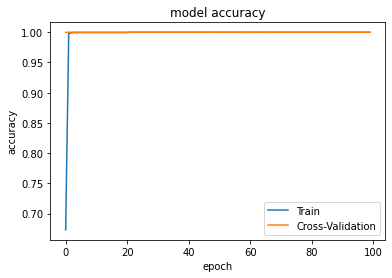

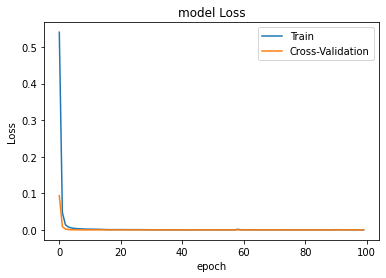

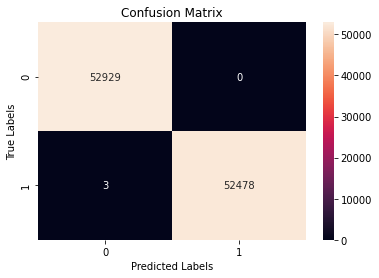

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_dim=25))  
model.add(Dropout(0.1))
model.add(Dense(1))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**DNN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
618/618 [==============================] - 4s 5ms/step - loss: 0.0270 - accuracy: 0.9912 - val_loss: 6.5453e-04 - val_accuracy: 0.9999
Epoch 2/100
618/618 [==============================] - 3s 5ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 5.7467e-04 - val_accuracy: 0.9999
Epoch 3/100
618/618 [==============================] - 3s 4ms/step - loss: 6.0579e-04 - accuracy: 0.9999 - val_loss: 4.8182e-04 - val_accuracy: 0.9999
Epoch 4/100
618/618 [==============================] - 3s 4ms/step - loss: 4.4665e-04 - accuracy: 1.0000 - val_loss: 3.0866e-04 - val_accuracy: 1.0000
Epoch 5/100
618/618 [==============================] - 3s 4ms/step - loss: 3.1376e-04 - accuracy: 1.0000 - val_loss: 2.9350e-04 - val_accuracy: 1.0000
Epoch 6/100
618/618 [==============================] - 3s 4ms/step - loss: 1.9159e-04 - accuracy: 1.0000 - val_loss: 2.1044e-04 - val_accuracy: 1.0000
Epoch 7/100
618/618 [==============================] - 2s 4ms/step - loss: 1.4334e-04 - accuracy: 1.00

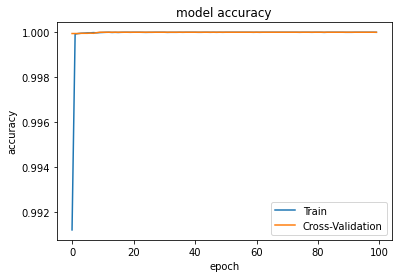

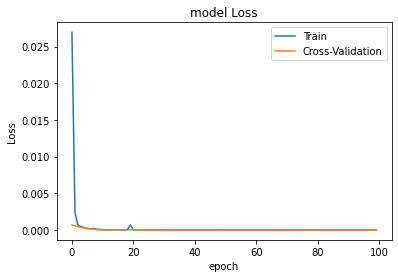

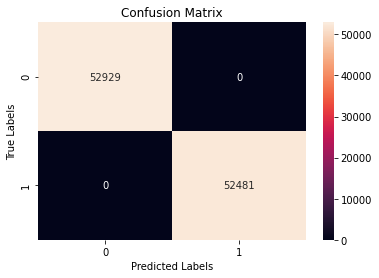

In [ ]:
from keras.layers import Dense, Dropout, Activation, Embedding



# 1. define the network
model = Sequential()
model.add(Dense(64,input_shape=(25,1),activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(1))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=100,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    
print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**CNN-RNN**

Epoch 1/100
309/309 [==============================] - 35s 34ms/step - loss: 0.1103 - accuracy: 0.9715 - val_loss: 1.9388 - val_accuracy: 0.6125
Epoch 2/100
309/309 [==============================] - 10s 33ms/step - loss: 0.0344 - accuracy: 0.9940 - val_loss: 4.7994e-05 - val_accuracy: 1.0000
Epoch 3/100
309/309 [==============================] - 10s 33ms/step - loss: 0.0168 - accuracy: 0.9978 - val_loss: 9.0446e-06 - val_accuracy: 1.0000
Epoch 4/100
309/309 [==============================] - 10s 34ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 5.3150e-06 - val_accuracy: 1.0000
Epoch 5/100
309/309 [==============================] - 10s 32ms/step - loss: 9.9954e-07 - accuracy: 1.0000 - val_loss: 3.5710e-06 - val_accuracy: 1.0000
Epoch 6/100
309/309 [==============================] - 10s 33ms/step - loss: 4.3659e-05 - accuracy: 1.0000 - val_loss: 5.3594e-08 - val_accuracy: 1.0000
Epoch 7/100
309/309 [==============================] - 11s 34ms/step - loss: 6.3172e-07 - accuracy: 1.

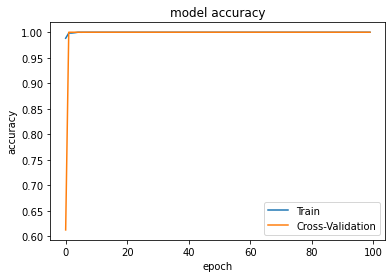

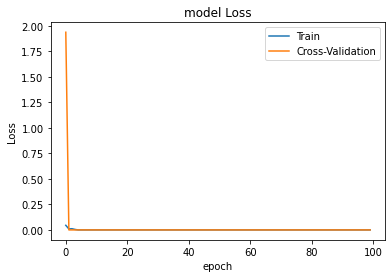

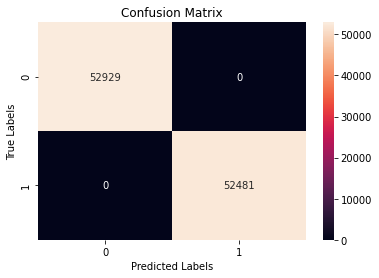

In [ ]:

import numpy as np


from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

from keras.layers import LSTM, GRU, SimpleRNN

lstm_output_size = 20
epochs = 100
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(SimpleRNN(lstm_output_size))
model.add(Dropout(0.2))


model.add(Dense(2, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
    #])
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=epochs, batch_size=1024, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)

print(confusion_matrix(y_test_class, y_pred_class))
print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

#**Packet-mqtt**#

In [ ]:
!pip3 install dask

In [ ]:
!pip install "dask[dataframe]"

     |████████████████████████████████| 118 kB 5.2 MB/s 


In [ ]:
pip show dask

Name: dask
Version: 2.12.0
Summary: Parallel PyData with Task Scheduling
Home-page: https://github.com/dask/dask/
Author: None
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: distributed


In [ ]:
import os
import glob as gl
import json
import math
import dask
import dask.array as da
from dask.distributed import Client
import dask.dataframe as dd
#import dask_ml
import dask.multiprocessing
from dask.diagnostics import ProgressBar

In [ ]:
columns = ['ttl', 'ip_len' , 'ip_flag_df',
           'ip_flag_mf', 'ip_flag_rb', 
           'src_port', 'dst_port',
           'tcp_flag_res','tcp_flag_ns',
           'tcp_flag_cwr','tcp_flag_ecn',
           'tcp_flag_urg','tcp_flag_ack',
           'tcp_flag_push','tcp_flag_reset',
           'tcp_flag_syn','tcp_flag_fin', 'is_attack']
drop_columns = ['timestamp', 'protocol','src_ip', 'dst_ip']
dtype={'dst_port': 'object',
       'ip_flag_df': 'object',
       'ip_flag_mf': 'object',
       'ip_flag_rb': 'object',
       'ip_len': 'object',
       'is_attack': 'object',
       'mqtt_flag_clean': 'object',
       'mqtt_flag_passwd': 'object',
       'mqtt_flag_qos': 'object',
       'mqtt_flag_reserved': 'object',
       'mqtt_flag_retain': 'object',
       'mqtt_flag_uname': 'object',
       'mqtt_flag_willflag': 'object',
       'mqtt_messagelength': 'object',
       'mqtt_messagetype': 'object',
       'src_port': 'object',
       'tcp_flag_ack': 'object',
       'tcp_flag_cwr': 'object',
       'tcp_flag_ecn': 'object',
       'tcp_flag_fin': 'object',
       'tcp_flag_ns': 'object',
       'tcp_flag_push': 'object',
       'tcp_flag_res': 'object',
       'tcp_flag_reset': 'object',
       'tcp_flag_syn': 'object',
       'tcp_flag_urg': 'object',
       'ttl': 'object'}

local_path = '/content/drive/MyDrive/packet/mqtt_bruteforce.csv'
#local_path = '/content/drive/MyDrive/Colab Notebooks/packet/*.csv'
# Reading a CSV file in Dask DataFrame

df = dd.read_csv(local_path, dtype = dtype)

# Computing NaN values in data

missing_values = df.isnull().sum()

missing_count = ((missing_values / df.index.size) * 100)

with ProgressBar():
  missing_count_pct = missing_count.compute()

# Dropping src and dst IP addresses, protocol, and features with NaN values

col_drop = missing_count_pct[missing_count_pct > 60] .index
with ProgressBar():
  df_dropped = df.drop(col_drop, axis =1).persist().fillna(-1).drop(columns = drop_columns)

  # Checking values of "is_attack" class, and Dropping values except 1 and 0
            #df_dropped['is_attack'].value_counts().compute()
  df = df_dropped.loc[df_dropped["is_attack"] != 'is_attack']

  #smote = SMOTE(sampling_strategy = 'minority')
  #X_sm, y_sm = smote.fit_sample(X,y)

  #X_sm = pd.DataFrame(X_sm, columns = columns)

  #scaling = StandardScaler()
  #df_clean = scaling.fit_transform(df)
  #X_clean = dd.from_array(df_clean, chunksize=200, columns=columns)

  #df = pd.DataFrame(np.array(df_clean), columns=columns)
  #(df_clean, chunksize=100, columns=columns)
# Writing clean data in CSV file
df.compute().to_csv('/content/drive/MyDrive/packet/mqtt_clean.csv', index=False)


[########################################] | 100% Completed |  1min 10.1s
[########################################] | 100% Completed | 55.5s


In [ ]:

#Read Independent and Dependent Features
local_path= '/content/drive/MyDrive/packet/mqtt_clean.csv'
df_Packet_mqtt = pd.read_csv(local_path)

df_Packet_mqtt.head()

,ttl,ip_len,ip_flag_df,ip_flag_mf,ip_flag_rb,src_port,dst_port,tcp_flag_res,tcp_flag_ns,tcp_flag_cwr,tcp_flag_ecn,tcp_flag_urg,tcp_flag_ack,tcp_flag_push,tcp_flag_reset,tcp_flag_syn,tcp_flag_fin,is_attack
0,64,83,1,0,0,46279,53,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
1,64,83,1,0,0,46279,53,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,64,83,1,0,0,53,46279,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
3,64,83,1,0,0,53,46279,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
4,64,83,1,0,0,53405,53,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


In [ ]:
df_Packet_mqtt.shape

(10045306, 18)

In [ ]:
X = df_Packet_mqtt.drop('is_attack', axis = 1)
y = df_Packet_mqtt['is_attack']
X.shape, y.shape

((10045306, 17), (10045306,))

In [ ]:
y.value_counts()

1    10013142
0       32164
Name: is_attack, dtype: int64

In [ ]:
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_sm = pd.DataFrame(X_sm, columns = ['ttl', 'ip_len' , 'ip_flag_df', 'ip_flag_mf', 'ip_flag_rb', 'src_port', 'dst_port','tcp_flag_res','tcp_flag_ns','tcp_flag_cwr','tcp_flag_ecn','tcp_flag_urg','tcp_flag_ack','tcp_flag_push','tcp_flag_reset','tcp_flag_syn','tcp_flag_fin'])
X_sm.to_csv('/content/drive/MyDrive/packet/X_sm.csv', index = False)

In [ ]:
y_sm = pd.DataFrame(y_sm, columns = ['is_attack'])
y_sm.to_csv('/content/drive/MyDrive/packet/y_sm.csv', index = False)

**X_train, y_train**

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/packet/X_sm.csv')
X.shape

(20026284, 17)

In [ ]:
X.head()

,ttl,ip_len,ip_flag_df,ip_flag_mf,ip_flag_rb,src_port,dst_port,tcp_flag_res,tcp_flag_ns,tcp_flag_cwr,tcp_flag_ecn,tcp_flag_urg,tcp_flag_ack,tcp_flag_push,tcp_flag_reset,tcp_flag_syn,tcp_flag_fin
0,64,83,1,0,0,46279,53,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,64,83,1,0,0,46279,53,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,64,83,1,0,0,53,46279,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,64,83,1,0,0,53,46279,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,64,83,1,0,0,53405,53,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
y = pd.read_csv('/content/drive/MyDrive/packet/y_sm.csv')
y.shape

(20026284, 1)

In [ ]:
y.value_counts()

is_attack
1            10013142
0            10013142
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y= pd.get_dummies(y1).values

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Y.shape

(20026284, 2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 42)

In [ ]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
#THIS PART IS FOR CNN-RNN

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

**LSTM**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
31292/31292 [==============================] - 311s 10ms/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0133 - val_accuracy: 0.9953
Epoch 2/10
31292/31292 [==============================] - 302s 10ms/step - loss: 0.0136 - accuracy: 0.9952 - val_loss: 0.0085 - val_accuracy: 0.9971
Epoch 3/10
31292/31292 [==============================] - 321s 10ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0315 - val_accuracy: 0.9874
Epoch 4/10
31292/31292 [==============================] - 317s 10ms/step - loss: 0.0111 - accuracy: 0.9971 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 5/10
31292/31292 [==============================] - 311s 10ms/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 0.0015 - val_accuracy: 0.9999
Epoch 6/10
31292/31292 [==============================] - 301s 10ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0016 - val_accuracy: 0.9999
Epoch 7/10
31292/31292 [==============================] - 309s 10ms/step - loss: 0.0034 - accuracy: 0.9993

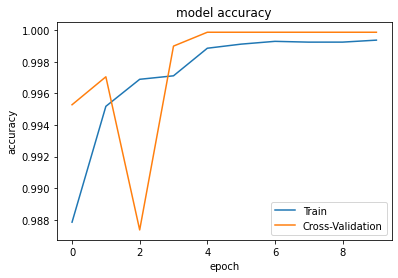

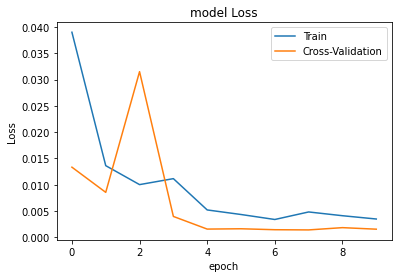

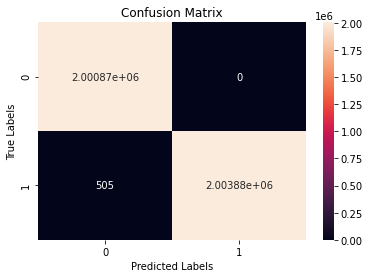

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_dim=25))  
model.add(Dropout(0.1))
model.add(Dense(1))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=10,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
29336/29336 [==============================] - 277s 9ms/step - loss: 0.0519 - accuracy: 0.9820 - val_loss: 0.0069 - val_accuracy: 0.9988
Epoch 2/10
29336/29336 [==============================] - 272s 9ms/step - loss: 0.0064 - accuracy: 0.9992 - val_loss: 0.0028 - val_accuracy: 0.9999
Epoch 3/10
29336/29336 [==============================] - 273s 9ms/step - loss: 0.0066 - accuracy: 0.9990 - val_loss: 0.0020 - val_accuracy: 0.9998
Epoch 4/10
29336/29336 [==============================] - 272s 9ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0010 - val_accuracy: 0.9999
Epoch 5/10
29336/29336 [==============================] - 271s 9ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 9.5521e-04 - val_accuracy: 0.9999
Epoch 6/10
29336/29336 [==============================] - 274s 9ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 9.7332e-04 - val_accuracy: 0.9999
Epoch 7/10
29336/29336 [==============================] - 269s 9ms/step - loss: 0.0028 - accuracy: 0.999

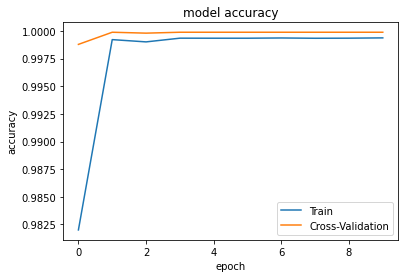

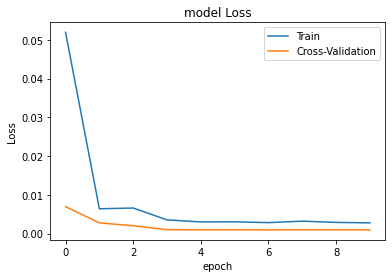

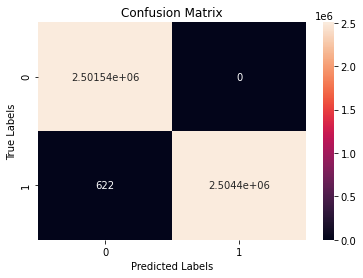

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_dim=25))  
model.add(Dropout(0.1))
model.add(Dense(1))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=10,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**DNN**

In [ ]:
weights_assigned={1:1, 0:1}

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
31292/31292 [==============================] - 134s 4ms/step - loss: 0.0186 - accuracy: 0.9929 - val_loss: 0.0064 - val_accuracy: 0.9999
Epoch 2/10
31292/31292 [==============================] - 129s 4ms/step - loss: 0.0208 - accuracy: 0.9921 - val_loss: 0.0156 - val_accuracy: 0.9999
Epoch 3/10
31292/31292 [==============================] - 139s 4ms/step - loss: 0.0204 - accuracy: 0.9925 - val_loss: 0.0641 - val_accuracy: 0.9746
Epoch 4/10
31292/31292 [==============================] - 137s 4ms/step - loss: 0.0289 - accuracy: 0.9878 - val_loss: 0.0997 - val_accuracy: 0.9620
Epoch 5/10
31292/31292 [==============================] - 152s 5ms/step - loss: 0.0280 - accuracy: 0.9884 - val_loss: 0.0856 - val_accuracy: 0.9620
Epoch 6/10
31292/31292 [==============================] - 132s 4ms/step - loss: 0.0277 - accuracy: 0.9885 - val_loss: 0.0975 - val_accuracy: 0.9620
Epoch 7/10
31292/31292 [==============================] - 137s 4ms/step - loss: 0.0278 - accuracy: 0.9884 - val_

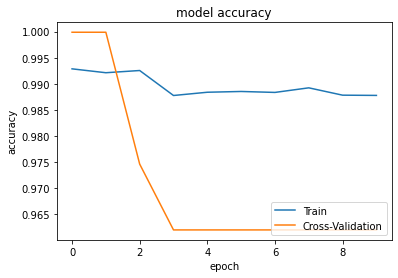

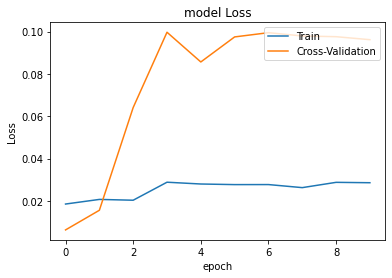

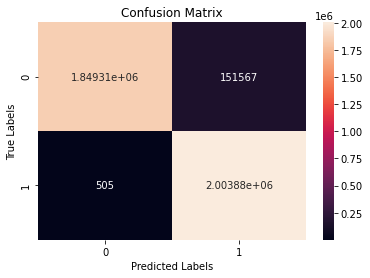

In [ ]:
from keras.layers import Dense, Dropout, Activation, Embedding



# 1. define the network
model = Sequential()
model.add(Dense(64,input_shape=(17,1),activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(2))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=10,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    
print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**CNN-RNN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
31292/31292 [==============================] - 631s 19ms/step - loss: 0.0120 - accuracy: 0.9950 - val_loss: 9.7105e-04 - val_accuracy: 0.9999
Epoch 2/10
31292/31292 [==============================] - 604s 19ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 9.6946e-04 - val_accuracy: 0.9999
Epoch 3/10
31292/31292 [==============================] - 657s 21ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 9.5678e-04 - val_accuracy: 0.9999
Epoch 4/10
31292/31292 [==============================] - 682s 22ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 9.5510e-04 - val_accuracy: 0.9999
Epoch 5/10
31292/31292 [==============================] - 651s 21ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 9.7889e-04 - val_accuracy: 0.9999
Epoch 6/10
31292/31292 [==============================] - 622s 20ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 9.5739e-04 - val_accuracy: 0.9999
Epoch 7/10
31292/31292 [==============================] - 635s 20ms/step - loss: 0

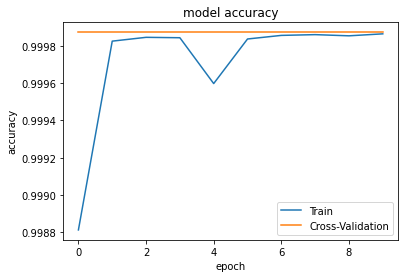

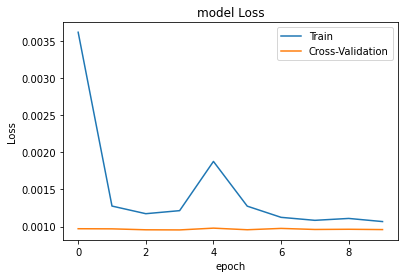

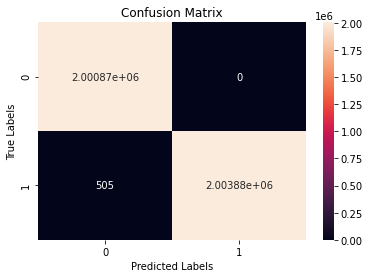

In [ ]:
import numpy as np


from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

from keras.layers import LSTM, GRU, SimpleRNN

lstm_output_size = 20
epochs = 10
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(SimpleRNN(lstm_output_size))
model.add(Dropout(0.2))


model.add(Dense(2, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
    #])
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=epochs, batch_size=512, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)

print(confusion_matrix(y_test_class, y_pred_class))
print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

#**Packet-overall**#

In [ ]:
columns = ['ttl', 'ip_len' , 'ip_flag_df',
           'ip_flag_mf', 'ip_flag_rb', 
           'src_port', 'dst_port',
           'tcp_flag_res','tcp_flag_ns',
           'tcp_flag_cwr','tcp_flag_ecn',
           'tcp_flag_urg','tcp_flag_ack',
           'tcp_flag_push','tcp_flag_reset',
           'tcp_flag_syn','tcp_flag_fin', 'is_attack']
drop_columns = ['timestamp', 'protocol','src_ip', 'dst_ip']
dtype={'dst_port': 'object',
       'ip_flag_df': 'object',
       'ip_flag_mf': 'object',
       'ip_flag_rb': 'object',
       'ip_len': 'object',
       'is_attack': 'object',
       'mqtt_flag_clean': 'object',
       'mqtt_flag_passwd': 'object',
       'mqtt_flag_qos': 'object',
       'mqtt_flag_reserved': 'object',
       'mqtt_flag_retain': 'object',
       'mqtt_flag_uname': 'object',
       'mqtt_flag_willflag': 'object',
       'mqtt_messagelength': 'object',
       'mqtt_messagetype': 'object',
       'src_port': 'object',
       'tcp_flag_ack': 'object',
       'tcp_flag_cwr': 'object',
       'tcp_flag_ecn': 'object',
       'tcp_flag_fin': 'object',
       'tcp_flag_ns': 'object',
       'tcp_flag_push': 'object',
       'tcp_flag_res': 'object',
       'tcp_flag_reset': 'object',
       'tcp_flag_syn': 'object',
       'tcp_flag_urg': 'object',
       'ttl': 'object'}

local_path = '/content/drive/MyDrive/packet/*.csv'
#local_path = '/content/drive/MyDrive/Colab Notebooks/packet/*.csv'
# Reading a CSV file in Dask DataFrame

df = dd.read_csv(local_path, dtype = dtype)

# Computing NaN values in data

missing_values = df.isnull().sum()

missing_count = ((missing_values / df.index.size) * 100)

with ProgressBar():
  missing_count_pct = missing_count.compute()

# Dropping src and dst IP addresses, protocol, and features with NaN values

col_drop = missing_count_pct[missing_count_pct > 60] .index
with ProgressBar():
  df_dropped = df.drop(col_drop, axis =1).persist().fillna(-1).drop(columns = drop_columns)

  # Checking values of "is_attack" class, and Dropping values except 1 and 0
            #df_dropped['is_attack'].value_counts().compute()
  df = df_dropped.loc[df_dropped["is_attack"] != 'is_attack']

  #smote = SMOTE(sampling_strategy = 'minority')
  #X_sm, y_sm = smote.fit_sample(X,y)

  #X_sm = pd.DataFrame(X_sm, columns = columns)

  #scaling = StandardScaler()
  #df_clean = scaling.fit_transform(df)
  #X_clean = dd.from_array(df_clean, chunksize=200, columns=columns)

  #df = pd.DataFrame(np.array(df_clean), columns=columns)
  #(df_clean, chunksize=100, columns=columns)
# Writing clean data in CSV file
df.compute().to_csv('/content/drive/MyDrive/packet/mqtt_clean_overall.csv', index=False)

[########################################] | 100% Completed |  1min 11.1s
[########################################] | 100% Completed | 51.3s


In [ ]:

#Read Independent and Dependent Features
local_path= '/content/drive/MyDrive/packet/mqtt_clean_overall.csv'
df_Packet_mqtt_overall = pd.read_csv(local_path)

df_Packet_mqtt_overall.head()

,ttl,ip_len,ip_flag_df,ip_flag_mf,ip_flag_rb,src_port,dst_port,tcp_flag_res,tcp_flag_ns,tcp_flag_cwr,tcp_flag_ecn,tcp_flag_urg,tcp_flag_ack,tcp_flag_push,tcp_flag_reset,tcp_flag_syn,tcp_flag_fin,is_attack
0,64,83,1,0,0,46279,53,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
1,64,83,1,0,0,46279,53,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,64,83,1,0,0,53,46279,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
3,64,83,1,0,0,53,46279,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
4,64,83,1,0,0,53405,53,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


In [ ]:
df_Packet_mqtt_overall.shape

(10389953, 18)

In [ ]:
X = df_Packet_mqtt_overall.drop('is_attack', axis = 1)
y = df_Packet_mqtt_overall['is_attack']
X.shape, y.shape

((10389953, 17), (10389953,))

In [ ]:
y.value_counts()

1    10076202
0      313751
Name: is_attack, dtype: int64

In [ ]:
smote = SMOTE(sampling_strategy = 'minority')
X_sm_overall, y_sm_overall = smote.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**ADASYN**

In [ ]:
X_ad_overall = pd.DataFrame(X_ad_overall, columns = ['ttl', 'ip_len' , 'ip_flag_df', 'ip_flag_mf', 'ip_flag_rb', 'src_port', 'dst_port','tcp_flag_res','tcp_flag_ns','tcp_flag_cwr','tcp_flag_ecn','tcp_flag_urg','tcp_flag_ack','tcp_flag_push','tcp_flag_reset','tcp_flag_syn','tcp_flag_fin'])
X_ad_overall.to_csv('/content/drive/MyDrive/packet/X_ad_overall.csv', index = False)

In [ ]:
y_ad_overall = pd.DataFrame(y_ad_overall, columns = ['is_attack'])
y_ad_overall.to_csv('/content/drive/MyDrive/packet/y_ad_overall.csv', index = False)

**SMOTE**

In [ ]:
X_sm_overall = pd.DataFrame(X_sm_overall, columns = ['ttl', 'ip_len' , 'ip_flag_df', 'ip_flag_mf', 'ip_flag_rb', 'src_port', 'dst_port','tcp_flag_res','tcp_flag_ns','tcp_flag_cwr','tcp_flag_ecn','tcp_flag_urg','tcp_flag_ack','tcp_flag_push','tcp_flag_reset','tcp_flag_syn','tcp_flag_fin'])
X_sm_overall.to_csv('/content/drive/MyDrive/packet/X_sm_overall.csv', index = False)

In [ ]:
y_sm_overall = pd.DataFrame(y_sm_overall, columns = ['is_attack'])
y_sm_overall.to_csv('/content/drive/MyDrive/packet/y_sm_overall.csv', index = False)

In [ ]:
method = SMOTE(kind='borderline1')

**X_train, y_train**

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/packet/X_sm_overall.csv')
X.shape

(20152404, 17)

In [ ]:
X.head()

,ttl,ip_len,ip_flag_df,ip_flag_mf,ip_flag_rb,src_port,dst_port,tcp_flag_res,tcp_flag_ns,tcp_flag_cwr,tcp_flag_ecn,tcp_flag_urg,tcp_flag_ack,tcp_flag_push,tcp_flag_reset,tcp_flag_syn,tcp_flag_fin
0,64,83,1,0,0,46279,53,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,64,83,1,0,0,46279,53,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,64,83,1,0,0,53,46279,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,64,83,1,0,0,53,46279,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,64,83,1,0,0,53405,53,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
y = pd.read_csv('/content/drive/MyDrive/packet/y_sm_overall.csv')
y.shape

(20152404, 1)

In [ ]:
y.value_counts()

is_attack
1            10076202
0            10076202
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y= pd.get_dummies(y1).values

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Y.shape

(20152404, 2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state =42)

In [ ]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
#THIS PART IS FOR CNN-RNN

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  
y_pred= classifier.predict(X_test) 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95   2013309
           1       0.91      1.00      0.95   2017172

    accuracy                           0.95   4030481
   macro avg       0.96      0.95      0.95   4030481
weighted avg       0.96      0.95      0.95   4030481

[[1821435  191874]
 [   1085 2016087]]
accuracy is 0.9521250689433842


In [ ]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  
#Predicting the test set result  
y_pred= classifier.predict(X_test)  
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
#Fitting NB classifier to the training set  
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
 
y_pred = classifier.predict(X_test)
 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
#Fitting RF classifier to the training set  
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

In [ ]:
weights_assigned={1:1, 0:7}

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_dim=17))  
model.add(Dropout(0.1))
model.add(Dense(1))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, class_weight=weights_assigned, epochs=10,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');








/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


NameError: ignored

**LSTM**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
31489/31489 [==============================] - 451s 14ms/step - loss: 0.4757 - accuracy: 0.7062 - val_loss: 0.4430 - val_accuracy: 0.7240
Epoch 2/10
31489/31489 [==============================] - 483s 15ms/step - loss: 0.4463 - accuracy: 0.7208 - val_loss: 0.4403 - val_accuracy: 0.7248
Epoch 3/10
31489/31489 [==============================] - 501s 16ms/step - loss: 0.4427 - accuracy: 0.7259 - val_loss: 0.4368 - val_accuracy: 0.7317
Epoch 4/10
31489/31489 [==============================] - 488s 16ms/step - loss: 0.4380 - accuracy: 0.7322 - val_loss: 0.4312 - val_accuracy: 0.7423
Epoch 5/10
31489/31489 [==============================] - 502s 16ms/step - loss: 0.4354 - accuracy: 0.7374 - val_loss: 0.4290 - val_accuracy: 0.7421
Epoch 6/10
31489/31489 [==============================] - 495s 16ms/step - loss: 0.4333 - accuracy: 0.7398 - val_loss: 0.4294 - val_accuracy: 0.7407
Epoch 7/10
31489/31489 [==============================] - 505s 16ms/step - loss: 0.4315 - accuracy: 0.7421

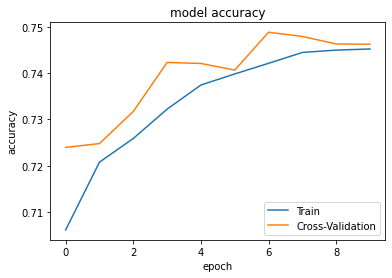

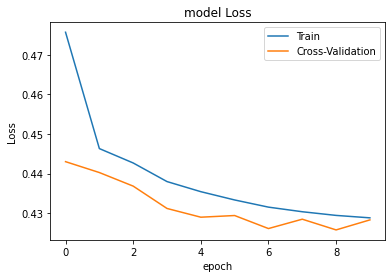

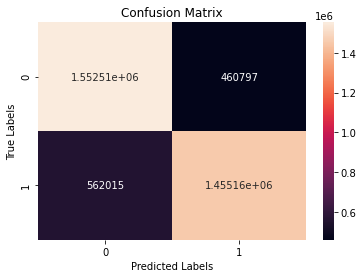

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(10,input_dim=17))  
model.add(Dropout(0.1))
model.add(Dense(2))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=10,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
31489/31489 [==============================] - 359s 11ms/step - loss: 0.5550 - accuracy: 0.6544 - val_loss: 0.5181 - val_accuracy: 0.6854
Epoch 2/10
31489/31489 [==============================] - 356s 11ms/step - loss: 0.4791 - accuracy: 0.6961 - val_loss: 0.4627 - val_accuracy: 0.7065
Epoch 3/10
31489/31489 [==============================] - 354s 11ms/step - loss: 0.4684 - accuracy: 0.7109 - val_loss: 0.4564 - val_accuracy: 0.7294
Epoch 4/10
31489/31489 [==============================] - 354s 11ms/step - loss: 0.4587 - accuracy: 0.7236 - val_loss: 0.4452 - val_accuracy: 0.7307
Epoch 5/10
31489/31489 [==============================] - 360s 11ms/step - loss: 0.4540 - accuracy: 0.7246 - val_loss: 0.4441 - val_accuracy: 0.7334
Epoch 6/10
31489/31489 [==============================] - 360s 11ms/step - loss: 0.4518 - accuracy: 0.7253 - val_loss: 0.4410 - val_accuracy: 0.7337
Epoch 7/10
31489/31489 [==============================] - 363s 12ms/step - loss: 0.4502 - accuracy: 0.7268

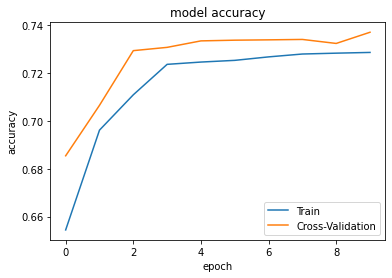

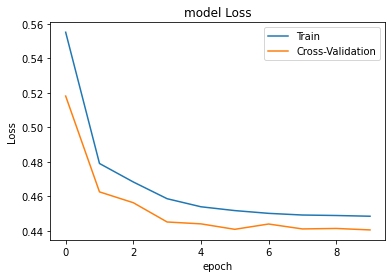

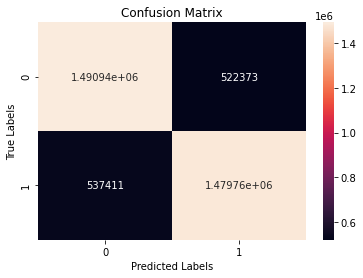

In [ ]:
from keras.layers import LSTM, SimpleRNN, GRU
from keras.layers import Dense, Dropout, Activation, Embedding

#from keras.optimizers import SGD
#opt = SGD(lr=0.0001)
#batch_size = 64

# 1. define the network
model = Sequential()
model.add(LSTM(4,input_dim=17))  
model.add(Dropout(0.1))
model.add(Dense(1))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=10,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**DNN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
31489/31489 [==============================] - 141s 4ms/step - loss: 0.4902 - accuracy: 0.7076 - val_loss: 0.4741 - val_accuracy: 0.7225
Epoch 2/10
31489/31489 [==============================] - 140s 4ms/step - loss: 0.4869 - accuracy: 0.7128 - val_loss: 0.4649 - val_accuracy: 0.7332
Epoch 3/10
31489/31489 [==============================] - 140s 4ms/step - loss: 0.4807 - accuracy: 0.7164 - val_loss: 0.4695 - val_accuracy: 0.7234
Epoch 4/10
31489/31489 [==============================] - 135s 4ms/step - loss: 0.4752 - accuracy: 0.7168 - val_loss: 0.4786 - val_accuracy: 0.7145
Epoch 5/10
31489/31489 [==============================] - 136s 4ms/step - loss: 0.4801 - accuracy: 0.7165 - val_loss: 0.4750 - val_accuracy: 0.7233
Epoch 6/10
31489/31489 [==============================] - 131s 4ms/step - loss: 0.4730 - accuracy: 0.7180 - val_loss: 0.4659 - val_accuracy: 0.7270
Epoch 7/10
31489/31489 [==============================] - 133s 4ms/step - loss: 0.4742 - accuracy: 0.7185 - val_

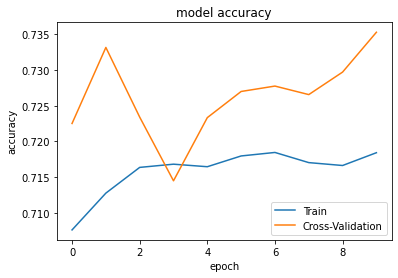

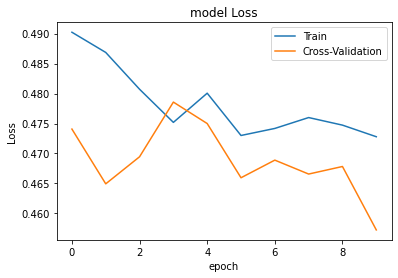

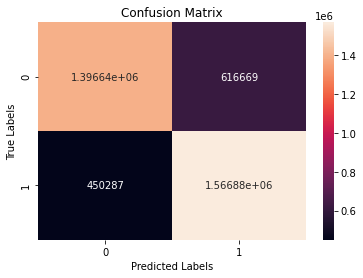

In [ ]:
from keras.layers import Dense, Dropout, Activation, Embedding



# 1. define the network
model = Sequential()
model.add(Dense(64,input_shape=(17,1),activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(2))


model.add(Dense(2, activation='softmax'))
 
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=10,batch_size=512, validation_data=(X_test, y_test), verbose=1)#, class_weight=class_weights)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    
print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');

**CNN-RNN**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
31489/31489 [==============================] - 614s 19ms/step - loss: 0.4903 - accuracy: 0.7125 - val_loss: 1.0041 - val_accuracy: 0.6535
Epoch 2/10
31489/31489 [==============================] - 626s 20ms/step - loss: 0.4455 - accuracy: 0.7380 - val_loss: 0.4355 - val_accuracy: 0.7403
Epoch 3/10
31489/31489 [==============================] - 632s 20ms/step - loss: 0.4420 - accuracy: 0.7394 - val_loss: 0.4323 - val_accuracy: 0.7462
Epoch 4/10
31489/31489 [==============================] - 634s 20ms/step - loss: 0.4395 - accuracy: 0.7407 - val_loss: 0.4293 - val_accuracy: 0.7468
Epoch 5/10
31489/31489 [==============================] - 648s 21ms/step - loss: 0.4379 - accuracy: 0.7415 - val_loss: 0.4335 - val_accuracy: 0.7453
Epoch 6/10
31489/31489 [==============================] - 652s 21ms/step - loss: 0.4367 - accuracy: 0.7429 - val_loss: 1.0069 - val_accuracy: 0.6101
Epoch 7/10
31489/31489 [==============================] - 643s 20ms/step - loss: 0.4370 - accuracy: 0.7432

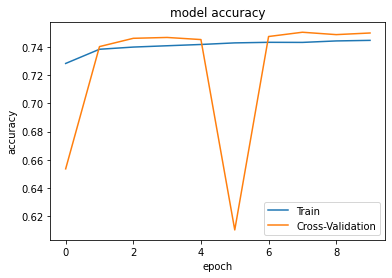

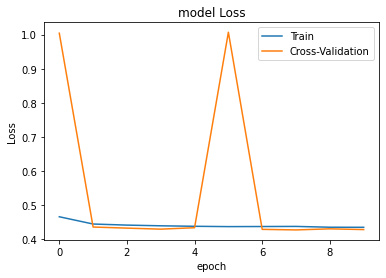

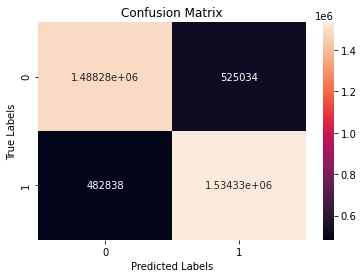

In [ ]:
import numpy as np


from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D

from keras.layers import LSTM, GRU, SimpleRNN

lstm_output_size = 20
epochs = 10
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = (17,1)))
model.add(BatchNormalization())
model.add(SimpleRNN(lstm_output_size))
model.add(Dropout(0.2))


model.add(Dense(2, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
    #])
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
   
history = model.fit(X_train, y_train, epochs=epochs, batch_size=512, validation_data=(X_test, y_test), verbose=1)
    
print(model.evaluate(X_test, y_test))
    
y_preds_dnn = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_preds_dnn, axis=1)
    

print(confusion_matrix(y_test_class, y_pred_class))

print("Classification Report: \n", classification_report(y_test_class, y_pred_class))

print('Summary of the results after each epoch')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
from matplotlib import pyplot as plt
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper right')
plt.show()

ax = plt.subplot()
predict_results = model.predict(X_test)
predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(y_test_class, predict_results)

sns.heatmap(cm, annot = True, ax =ax, fmt='g'); # cmap= "YlGnBu"
ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix');